# AI重建古籍残片：用神经网络复原历史文献

**基于 Google DeepMind Aeneas/Ithaca 项目的古代碑铭修复实验**

---

## 课程简介

本实验将带你体验人工智能如何"阅读"和"复原"古代文献。你将学习：

1. **古籍残片修复**的挑战与传统人文学方法
2. **Aeneas模型**如何通过上下文学习自动修复拉丁文碑铭
3. **图像分析功能**：上传碑铭照片，AI结合视觉特征进行修复
4. **Ithaca模型**如何处理古希腊文残卷
5. **通用语言模型**（BERT）的填空原理演示
6. **对比分析**专业模型与通用模型的差异

---

## 背景知识

| 概念 | 说明 |
|------|------|
| 碑铭学 (Epigraphy) | 研究古代刻写文字的学科 |
| 文本修复 (Restoration) | 补全残缺或损坏的文字 |
| 年代归属 (Dating) | 推断文献的书写年代 |
| 地理定位 (Attribution) | 确定文献的来源地区 |
| 平行文本 (Parallels) | 具有相似措辞或语境的其他文献 |
| 多模态分析 | 同时利用文本和图像信息进行推理 |

---

## 技术基础

本实验使用的AI模型基于 **Transformer** 架构，这是一种能够理解文本上下文关系的深度学习模型。

**Aeneas** 和 **Ithaca** 是 Google DeepMind 专门为古代碑铭研究训练的模型：
- Aeneas：处理拉丁文，训练数据来自176,000+条罗马碑铭，支持图像输入
- Ithaca：处理古希腊文，训练数据来自希腊碑铭数据库

---

---

## 数据来源与参考资料

**模型与代码**
- GitHub 仓库：[google-deepmind/predictingthepast](https://github.com/google-deepmind/predictingthepast)

**研究论文**
- Aeneas: Sommerschield et al. (2023) "Machine learning for ancient languages: A survey" *Computational Linguistics*
- Ithaca: Assael et al. (2022) "Restoring and attributing ancient texts using deep neural networks" *Nature* 603, 280–283

**碑铭数据库**
- 拉丁碑铭数据集 (LED)：整合自 EDR、EDH、EDCS 三大数据库，含176,000+条碑铭
- 希腊碑铭数据集 (I.PHI)：Packard Humanities Institute，含约80,000条碑铭

**在线工具**
- Ithaca 在线演示：[ithaca.deepmind.com](https://ithaca.deepmind.com)

---

## 目录

- [第零部分: 环境配置与准备](#part0)
- [第一部分: 认识古籍残片](#part1)
- [第二部分: Aeneas模型 - 拉丁文碑铭修复](#part2)
- [第三部分: 图像分析与多模态修复](#part3)
- [第四部分: Ithaca模型 - 古希腊文残卷修复](#part4)
- [第五部分: BERT模型 - 通用语言填空原理](#part5)
- [第六部分: 模型对比与分析](#part6)
- [第七部分: 学生实验记录](#part7)
- [附录: 延伸思考与讨论](#appendix)

---
<a id='part0'></a>
# 第零部分: 环境配置与准备

本部分将完成所有必要的准备工作：
- 检测GPU运行环境
- 安装必要的Python库
- 下载预训练模型

**操作说明**：点击每个代码单元格左侧的「运行」按钮，或按 `Shift + Enter` 执行。

In [1]:
#@title ## 0.1 检查运行环境 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，检查你的Colab环境是否已正确配置GPU。
#@markdown
#@markdown 推荐配置：
#@markdown - GPU: A100 / V100 / T4
#@markdown - 如未检测到GPU，请点击菜单 `运行时` -> `更改运行时类型` -> 选择 `GPU`
#@markdown ---

import sys
import os

print("=" * 60)
print(" 环境检测")
print("=" * 60)

# Python 版本
print(f"\n Python 版本: {sys.version.split()[0]}")

# 检测是否在 Colab 环境
IN_COLAB = 'google.colab' in sys.modules
print(f" 运行环境: {'Google Colab' if IN_COLAB else '本地环境'}")

# GPU 检测
GPU_AVAILABLE = False
try:
    import subprocess
    result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'],
                          capture_output=True, text=True)
    if result.returncode == 0:
        gpu_info = result.stdout.strip()
        print(f"\n GPU 可用: {gpu_info}")
        print(" 状态: GPU环境已就绪")
        GPU_AVAILABLE = True
    else:
        print("\n 未检测到 GPU")
        print(" 提示: 请在菜单中选择 运行时 -> 更改运行时类型 -> GPU")
        print(" 注意: CPU模式下推理速度会较慢（约30-60秒/次）")
except:
    print("\n 无法检测 GPU，将使用CPU模式")

print("\n" + "=" * 60)

 环境检测

 Python 版本: 3.12.12
 运行环境: Google Colab

 GPU 可用: NVIDIA A100-SXM4-40GB, 40960 MiB
 状态: GPU环境已就绪



In [2]:
#@title ## 0.2 安装必要的库 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，安装本实验需要的Python库。
#@markdown
#@markdown 将安装以下库：
#@markdown - `predictingthepast`: DeepMind官方Aeneas/Ithaca推理库
#@markdown - `jax/jaxlib`: 高性能数值计算库（模型后端）
#@markdown - `transformers`: Hugging Face模型库（用于BERT演示）
#@markdown - `Pillow`: 图像处理库
#@markdown - `ipywidgets`: 交互式控件
#@markdown
#@markdown ---

print(" 正在安装依赖库...")
print("-" * 40)

import subprocess
import sys

# 安装列表
install_commands = [
    ("安装 JAX (GPU版本)", "pip install -q 'jax[cuda12]' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html"),
    ("安装 predictingthepast", "pip install -q git+https://github.com/google-deepmind/predictingthepast.git"),
    ("安装 transformers (numpy2兼容)", "pip install -q 'transformers>=4.40.0' accelerate"),
    ("安装 Pillow", "pip install -q Pillow"),
    ("安装 ipywidgets", "pip install -q ipywidgets"),
    ("安装 pandas", "pip install -q pandas"),
    ("安装 matplotlib", "pip install -q matplotlib"),
    ("安装 scipy (numpy2兼容)", "pip install -q 'scipy>=1.13.0'"),
]

for i, (desc, cmd) in enumerate(install_commands, 1):
    print(f"[{i}/{len(install_commands)}] {desc}...")
    try:
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        if result.returncode == 0:
            print(f"    完成")
        else:
            print(f"    警告: {result.stderr[:80] if result.stderr else '未知错误'}")
    except Exception as e:
        print(f"    错误: {str(e)[:80]}")

# 启用widgets
try:
    from google.colab import output
    output.enable_custom_widget_manager()
    print("\n 交互式控件已启用")
except:
    pass

print("-" * 40)
print(" 所有依赖安装完成")

 正在安装依赖库...
----------------------------------------
[1/8] 安装 JAX (GPU版本)...
    完成
[2/8] 安装 predictingthepast...
    完成
[3/8] 安装 transformers (numpy2兼容)...
    完成
[4/8] 安装 Pillow...
    完成
[5/8] 安装 ipywidgets...
    完成
[6/8] 安装 pandas...
    完成
[7/8] 安装 matplotlib...
    完成
[8/8] 安装 scipy (numpy2兼容)...
    完成

 交互式控件已启用
----------------------------------------
 所有依赖安装完成


In [3]:
#@title ## 0.3 导入库并配置环境 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，导入所有需要的库并进行初始配置。
#@markdown ---

print(" 正在导入库...")
print("-" * 40)

# 基础库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import json
import os
import io
import pickle
import time
from datetime import datetime
warnings.filterwarnings('ignore')

print(f" [1/9] 基础库导入完成 (numpy {np.__version__})")

# scipy 版本检查
try:
    import scipy
    print(f" [2/9] SciPy 版本: {scipy.__version__}")
except ImportError:
    print(" [2/9] SciPy 未安装")

# 图像处理
PIL_AVAILABLE = False
try:
    from PIL import Image
    print(" [3/9] PIL图像库导入完成")
    PIL_AVAILABLE = True
except ImportError:
    print(" [3/9] PIL导入失败")

# JAX
JAX_AVAILABLE = False
try:
    import jax
    import jax.numpy as jnp
    print(f" [4/9] JAX 版本: {jax.__version__}, 后端: {jax.default_backend()}")
    JAX_AVAILABLE = True
except ImportError as e:
    print(f" [4/9] JAX 导入失败: {e}")

# Predictingthepast (Aeneas/Ithaca) - 正确的导入路径
AENEAS_AVAILABLE = False
try:
    from predictingthepast.eval import inference as ptp_inference
    from predictingthepast.models.model import Model as PTPModel
    from predictingthepast.util import alphabet as util_alphabet
    print(" [5/9] Aeneas/Ithaca 推理库导入完成")
    AENEAS_AVAILABLE = True
except ImportError as e:
    print(f" [5/9] Aeneas/Ithaca 导入失败: {e}")

# Transformers (BERT)
BERT_AVAILABLE = False
try:
    from transformers import pipeline
    print(" [6/9] Transformers 库导入完成")
    BERT_AVAILABLE = True
except ImportError as e:
    short_err = str(e).split('\n')[0][:60]
    print(f" [6/9] Transformers 导入失败: {short_err}")
    print("       提示: 运行 !pip install 'scipy>=1.13.0' 后重启运行时")

# 交互式控件
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display, clear_output, HTML
print(" [7/9] 交互式控件导入完成")

# 设置中文字体（Colab环境）
try:
    import subprocess
    subprocess.run(['apt-get', 'install', '-y', '-qq', 'fonts-noto-cjk'],
                   capture_output=True, check=False)
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'SimHei', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    print(" [8/9] 中文字体配置完成")
except:
    print(" [8/9] 中文字体配置跳过")

# 设置绘图风格
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    pass
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
print(" [9/9] 绘图环境配置完成")

print("-" * 40)
print(" 库导入完成")
print("=" * 60)
print("=" * 60)

 正在导入库...
----------------------------------------
 [1/9] 基础库导入完成 (numpy 2.4.1)
 [2/9] SciPy 版本: 1.16.3
 [3/9] PIL图像库导入完成
 [4/9] JAX 版本: 0.7.2, 后端: gpu
 [5/9] Aeneas/Ithaca 推理库导入完成
 [6/9] Transformers 库导入完成
 [7/9] 交互式控件导入完成
 [8/9] 中文字体配置完成
 [9/9] 绘图环境配置完成
----------------------------------------
 库导入完成


In [4]:
#@title ## 0.4 下载预训练模型 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，下载Aeneas和Ithaca的预训练模型。
#@markdown
#@markdown 模型文件说明：
#@markdown - `aeneas_*.pkl`: Aeneas拉丁文模型权重（约500MB）
#@markdown - `led.json`: 拉丁碑铭数据集索引
#@markdown - `ithaca_*.pkl`: Ithaca古希腊文模型权重（约500MB）
#@markdown - `iphi.json`: 希腊碑铭数据集索引
#@markdown
#@markdown ---

import urllib.request
import os

print("=" * 60)
print(" 下载预训练模型")
print("=" * 60)

# 模型存储路径
MODEL_DIR = "/content/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# 模型下载列表
models_to_download = [
    # Aeneas (拉丁文)
    ("Aeneas 模型权重", "aeneas_117149994_2.pkl",
     "https://storage.googleapis.com/ithaca-resources/models/aeneas_117149994_2.pkl"),
    ("拉丁碑铭数据集", "led.json",
     "https://storage.googleapis.com/ithaca-resources/models/led.json"),
    ("拉丁碑铭嵌入向量", "led_emb_xid117149994.pkl",
     "https://storage.googleapis.com/ithaca-resources/models/led_emb_xid117149994.pkl"),
    # Ithaca (古希腊文)
    ("Ithaca 模型权重", "ithaca_153143996_2.pkl",
     "https://storage.googleapis.com/ithaca-resources/models/ithaca_153143996_2.pkl"),
    ("希腊碑铭数据集", "iphi.json",
     "https://storage.googleapis.com/ithaca-resources/models/iphi.json"),
    ("希腊碑铭嵌入向量", "iphi_emb_xid153143996.pkl",
     "https://storage.googleapis.com/ithaca-resources/models/iphi_emb_xid153143996.pkl"),
]

def download_with_progress(url, filepath, desc):
    """下载文件并显示进度"""
    if os.path.exists(filepath):
        size_mb = os.path.getsize(filepath) / (1024 * 1024)
        print(f"    已存在 ({size_mb:.1f} MB)，跳过下载")
        return True
    try:
        print(f"    正在下载...")
        urllib.request.urlretrieve(url, filepath)
        size_mb = os.path.getsize(filepath) / (1024 * 1024)
        print(f"    完成 ({size_mb:.1f} MB)")
        return True
    except Exception as e:
        print(f"    下载失败: {str(e)[:50]}")
        return False

# 执行下载
download_success = {}
for i, (desc, filename, url) in enumerate(models_to_download, 1):
    print(f"\n[{i}/{len(models_to_download)}] {desc}")
    filepath = os.path.join(MODEL_DIR, filename)
    download_success[filename] = download_with_progress(url, filepath, desc)

# 检查结果
print("\n" + "=" * 60)
print(" 下载结果汇总")
print("-" * 40)

aeneas_ready = all(download_success.get(f, False) for f in
                   ["aeneas_117149994_2.pkl", "led.json", "led_emb_xid117149994.pkl"])
ithaca_ready = all(download_success.get(f, False) for f in
                   ["ithaca_153143996_2.pkl", "iphi.json", "iphi_emb_xid153143996.pkl"])

print(f" Aeneas (拉丁文): {'就绪' if aeneas_ready else '未就绪'}")
print(f" Ithaca (希腊文): {'就绪' if ithaca_ready else '未就绪'}")
print("=" * 60)

# 保存路径供后续使用
AENEAS_CHECKPOINT = os.path.join(MODEL_DIR, "aeneas_117149994_2.pkl")
AENEAS_DATASET = os.path.join(MODEL_DIR, "led.json")
AENEAS_RETRIEVAL = os.path.join(MODEL_DIR, "led_emb_xid117149994.pkl")

ITHACA_CHECKPOINT = os.path.join(MODEL_DIR, "ithaca_153143996_2.pkl")
ITHACA_DATASET = os.path.join(MODEL_DIR, "iphi.json")
ITHACA_RETRIEVAL = os.path.join(MODEL_DIR, "iphi_emb_xid153143996.pkl")

 下载预训练模型

[1/6] Aeneas 模型权重
    已存在 (138.9 MB)，跳过下载

[2/6] 拉丁碑铭数据集
    已存在 (59.6 MB)，跳过下载

[3/6] 拉丁碑铭嵌入向量
    已存在 (271.4 MB)，跳过下载

[4/6] Ithaca 模型权重
    已存在 (135.9 MB)，跳过下载

[5/6] 希腊碑铭数据集
    已存在 (206.7 MB)，跳过下载

[6/6] 希腊碑铭嵌入向量
    已存在 (269.0 MB)，跳过下载

 下载结果汇总
----------------------------------------
 Aeneas (拉丁文): 就绪
 Ithaca (希腊文): 就绪


In [5]:
#@title ## 0.5 加载模型到内存 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，将模型加载到GPU/CPU内存中。
#@markdown
#@markdown ---

import time

print("=" * 60)
print(" 加载模型到内存")
print("=" * 60)

# 存储加载的模型组件
loaded_models = {}

def load_checkpoint(checkpoint_path, language):
    """加载Aeneas/Ithaca模型检查点"""
    with open(checkpoint_path, 'rb') as f:
        checkpoint = pickle.load(f)

    # 将参数放到设备上
    params = jax.device_put(checkpoint['params'])

    # 重建模型
    model = PTPModel(**checkpoint['model_config'])
    forward = model.apply

    # 获取配置信息
    region_map = checkpoint.get('region_map', {})
    wordlist = checkpoint.get('wordlist')

    # 创建字母表（注意：GreekAlphabet不接受wordlist参数）
    if language == 'latin':
        alphabet = util_alphabet.LatinAlphabet(wordlist=wordlist)
    else:
        alphabet = util_alphabet.GreekAlphabet()

    vocab_char_size = checkpoint.get('vocab_char_size', len(alphabet.idx2char))

    return {
        'params': params,
        'forward': forward,
        'alphabet': alphabet,
        'vocab_char_size': vocab_char_size,
        'region_map': region_map,
        'model_config': checkpoint.get('model_config', {})
    }

# 加载 Aeneas
print("\n[1/3] 加载 Aeneas (拉丁文模型)...")
try:
    if AENEAS_AVAILABLE and os.path.exists(AENEAS_CHECKPOINT):
        loaded_models['aeneas'] = load_checkpoint(AENEAS_CHECKPOINT, 'latin')
        loaded_models['aeneas']['dataset'] = ptp_inference.load_dataset(AENEAS_DATASET)
        loaded_models['aeneas']['retrieval'] = ptp_inference.load_retrieval(AENEAS_RETRIEVAL)
        print("    Aeneas 加载成功")
    else:
        print("    Aeneas 模型文件不存在或库未安装，跳过")
except Exception as e:
    print(f"    Aeneas 加载失败: {str(e)[:100]}")

# 加载 Ithaca
print("\n[2/3] 加载 Ithaca (古希腊文模型)...")
try:
    if AENEAS_AVAILABLE and os.path.exists(ITHACA_CHECKPOINT):
        loaded_models['ithaca'] = load_checkpoint(ITHACA_CHECKPOINT, 'greek')
        loaded_models['ithaca']['dataset'] = ptp_inference.load_dataset(ITHACA_DATASET)
        loaded_models['ithaca']['retrieval'] = ptp_inference.load_retrieval(ITHACA_RETRIEVAL)
        print("    Ithaca 加载成功")
    else:
        print("    Ithaca 模型文件不存在或库未安装，跳过")
except Exception as e:
    print(f"    Ithaca 加载失败: {str(e)[:100]}")

# 加载 BERT
print("\n[3/3] 加载 BERT (通用语言模型)...")
try:
    if BERT_AVAILABLE:
        loaded_models['bert'] = pipeline('fill-mask', model='bert-base-multilingual-cased')
        print("    BERT 加载成功 (bert-base-multilingual-cased)")
except Exception as e:
    print(f"    BERT 加载失败: {str(e)[:100]}")

# ========== 辅助函数定义 ==========

def run_ithaca_restoration(text):
    """运行 Ithaca 希腊文修复"""

    print("=" * 60)
    print(" Ithaca 古希腊文碑铭修复")
    print("=" * 60)
    print(f"\n 输入文本: {text}")
    print("-" * 40)

    if 'ithaca' not in loaded_models:
        print("\n [错误] Ithaca 模型未加载")
        return

    if '#' not in text:
        print("\n [错误] 请使用 '#' 标记需要修复的位置")
        return

    m = loaded_models['ithaca']

    print("\n 正在运行AI推理（约需1-2分钟）...")

    try:
        start_time = time.time()
        result = ptp_inference.restore(
            text=text,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )
        elapsed = time.time() - start_time

        print(f" 推理完成，耗时 {elapsed:.1f} 秒")
        print("\n" + "-" * 40)
        print(" 修复结果:")
        print(f"   原文: {text}")

        if hasattr(result, 'predictions') and result.predictions:
            sorted_preds = sorted(result.predictions[:10],
                                  key=lambda p: p.score if hasattr(p, 'score') else 0,
                                  reverse=True)

            top_text = sorted_preds[0].text.upper()
            print(f"   最佳修复: {top_text}")

            print("\n 候选修复 (按置信度排序):")
            for i, pred in enumerate(sorted_preds[:5], 1):
                pred_text = pred.text.upper()
                score = pred.score
                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {pred_text} (置信度: {score_str})")
        else:
            print("   [警告] 未能获取预测结果")

    except Exception as e:
        print(f"\n [错误] 推理出错: {str(e)[:200]}")

    print("\n" + "=" * 60)

# 汇总
print("\n" + "=" * 60)
print(" 模型加载汇总")
print("-" * 40)
print(f" Aeneas (拉丁文):    {'已加载' if 'aeneas' in loaded_models else '未加载'}")
print(f" Ithaca (古希腊文):  {'已加载' if 'ithaca' in loaded_models else '未加载'}")
print(f" BERT (多语言):      {'已加载' if 'bert' in loaded_models else '未加载'}")
print("\n 环境准备完成，可以开始实验")
print("=" * 60)

 加载模型到内存

[1/3] 加载 Aeneas (拉丁文模型)...
    Aeneas 加载成功

[2/3] 加载 Ithaca (古希腊文模型)...
    Ithaca 加载成功

[3/3] 加载 BERT (通用语言模型)...


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Device set to use cuda:0


    BERT 加载成功 (bert-base-multilingual-cased)

 模型加载汇总
----------------------------------------
 Aeneas (拉丁文):    已加载
 Ithaca (古希腊文):  已加载
 BERT (多语言):      已加载

 环境准备完成，可以开始实验


---
<a id='part1'></a>
# 第一部分: 认识古籍残片

在开始AI实验之前，让我们先了解古籍残片修复面临的挑战。

## 为什么古籍会残缺？

| 原因 | 说明 |
|------|------|
| 自然风化 | 石刻、金属铭文经历千年风雨侵蚀 |
| 人为破坏 | 战争、宗教冲突、政治清洗导致的故意损毁 |
| 材料老化 | 莎草纸、羊皮纸等载体的自然降解 |
| 物理损伤 | 断裂、火灾、水浸等意外事故 |

## 传统修复方法

历史学家传统上依靠以下方法修复残缺文本：

1. **平行文本比对**：寻找措辞相似的其他碑铭作为参考
2. **公式化表达**：利用古代文献中常见的固定格式
3. **语法推断**：根据语法规则推测缺失部分
4. **历史语境**：结合时代背景和出土地点信息

这些方法高度依赖专家经验，耗时且主观性强。

## AI如何帮助？

AI模型可以：
- 同时"阅读"数十万条碑铭，发现人类难以察觉的模式
- 在几秒钟内完成需要数周的文献检索工作
- 提供概率化的预测，量化不确定性
- 结合图像特征，分析刻写风格和石材类型
- 作为研究助手，而非替代专家判断

In [8]:
#@title ## 1.1 示例碑铭展示 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，查看本实验将使用的示例碑铭。
#@markdown
#@markdown 在碑铭学中，符号 `#` 表示未知长度的缺失部分。
#@markdown ---

# 定义示例碑铭
SAMPLE_INSCRIPTIONS = {
    "latin": [
        {
            "id": "L1",
            "name": "罗马皇帝碑铭",
            "damaged": "IMP CAESAR DIVI # AVGVSTVS",
            "context": "这是一段典型的罗马皇帝铭文开头，IMP代表Imperator（统帅），AVGVSTVS代表Augustus（奥古斯都）",
            "expected": "IMP CAESAR DIVI FILIVS AVGVSTVS",
            "translation": "神之子，统帅凯撒奥古斯都"
        },
        {
            "id": "L2",
            "name": "墓碑铭文",
            "damaged": "DIS MANIBVS # VIXIT ANNIS XXX",
            "context": "DIS MANIBVS是罗马墓碑的标准开头，意为'献给亡灵之神'",
            "expected": "DIS MANIBVS SACRVM VIXIT ANNIS XXX",
            "translation": "献给神圣的亡灵，享年三十岁"
        },
        {
            "id": "L3",
            "name": "建筑献词",
            "damaged": "# SENATVS POPVLVSQVE ROMANVS",
            "context": "著名的SPQR格式，代表罗马元老院与人民",
            "expected": "EX SENATVS CONSVLTO SENATVS POPVLVSQVE ROMANVS",
            "translation": "根据元老院决议，罗马元老院与人民"
        },
    ],
    "greek": [
        {
            "id": "G1",
            "name": "雅典民主法令",
            "damaged": "# ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ",
            "context": "雅典民主决议的标准开头格式",
            "expected": "ΘΕΟΙ ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ",
            "translation": "诸神在上，议事会与人民决议"
        },
        {
            "id": "G2",
            "name": "神庙奉献",
            "damaged": "ΑΘΗΝΑΙΟΙ ΑΝΕΘΕΣΑΝ ΤΩΙ # ΕΚ ΤΩΝ ΜΗΔΙΚΩΝ",
            "context": "希腊城邦战胜波斯后的奉献铭文",
            "expected": "ΑΘΗΝΑΙΟΙ ΑΝΕΘΕΣΑΝ ΤΩΙ ΑΠΟΛΛΩΝΙ ΕΚ ΤΩΝ ΜΗΔΙΚΩΝ",
            "translation": "雅典人将此物献给阿波罗，取自波斯战利品"
        },
    ]
}

print("=" * 60)
print(" 示例碑铭库")
print("=" * 60)

print("\n" + "-" * 40)
print(" 拉丁文碑铭 (供Aeneas使用)")
print("-" * 40)
for item in SAMPLE_INSCRIPTIONS["latin"]:
    print(f"\n[{item['id']}] {item['name']}")
    print(f"  残片: {item['damaged']}")
    print(f"  背景: {item['context']}")

print("\n" + "-" * 40)
print(" 古希腊文碑铭 (供Ithaca使用)")
print("-" * 40)
for item in SAMPLE_INSCRIPTIONS["greek"]:
    print(f"\n[{item['id']}] {item['name']}")
    print(f"  残片: {item['damaged']}")
    print(f"  背景: {item['context']}")

print("\n" + "=" * 60)
print(" 说明: '#' 符号表示需要AI补全的缺失部分")
print("=" * 60)

 示例碑铭库

----------------------------------------
 拉丁文碑铭 (供Aeneas使用)
----------------------------------------

[L1] 罗马皇帝碑铭
  残片: IMP CAESAR DIVI # AVGVSTVS
  背景: 这是一段典型的罗马皇帝铭文开头，IMP代表Imperator（统帅），AVGVSTVS代表Augustus（奥古斯都）

[L2] 墓碑铭文
  残片: DIS MANIBVS # VIXIT ANNIS XXX
  背景: DIS MANIBVS是罗马墓碑的标准开头，意为'献给亡灵之神'

[L3] 建筑献词
  残片: # SENATVS POPVLVSQVE ROMANVS
  背景: 著名的SPQR格式，代表罗马元老院与人民

----------------------------------------
 古希腊文碑铭 (供Ithaca使用)
----------------------------------------

[G1] 雅典民主法令
  残片: # ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ
  背景: 雅典民主决议的标准开头格式

[G2] 神庙奉献
  残片: ΑΘΗΝΑΙΟΙ ΑΝΕΘΕΣΑΝ ΤΩΙ # ΕΚ ΤΩΝ ΜΗΔΙΚΩΝ
  背景: 希腊城邦战胜波斯后的奉献铭文

 说明: '#' 符号表示需要AI补全的缺失部分


---
<a id='part2'></a>
# 第二部分: Aeneas模型 - 拉丁文碑铭修复

Aeneas是Google DeepMind于2025年发布的专门用于拉丁文碑铭研究的AI模型。

## 模型能力

| 任务 | 说明 | 准确率 |
|------|------|--------|
| 文本修复 | 补全缺失字符（已知长度） | 73% |
| 未知长度修复 | 补全任意长度缺失 | 58% |
| 年代预测 | 估计碑铭书写年代 | 误差约13年 |
| 地理定位 | 确定罗马行省来源 | 72% |

## 常见拉丁碑铭缩写

| 缩写 | 全文 | 含义 |
|------|------|------|
| F | FILIVS | 儿子 |
| AVG | AVGVSTVS | 奥古斯都 |
| IMP | IMPERATOR | 统帅/皇帝 |
| COS | CONSVL | 执政官 |
| D M | DIS MANIBVS | 献给亡灵之神 |
| S P Q R | SENATVS POPVLVSQVE ROMANVS | 元老院与罗马人民 |

## 使用方法

在输入文本中，用 `#` 符号标记需要AI补全的缺失部分。例如：
- `IMP CAESAR # AVGVSTVS` - AI将尝试填补中间的缺失

In [9]:
#@title ## 2.1 Aeneas 文本修复示例 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，观看Aeneas修复拉丁文碑铭的演示。
#@markdown
#@markdown 示例：罗马皇帝碑铭 `IMP CAESAR DIVI # AVGVSTVS`
#@markdown ---

# 固定示例
DEMO_TEXT = "IMP CAESAR DIVI # AVGVSTVS"

print("=" * 60)
print(" Aeneas 文本修复示例")
print("=" * 60)
print(f"\n 示例碑铭: {DEMO_TEXT}")
print(" 背景: 罗马皇帝奥古斯都的标准头衔")
print(" 任务: AI补全 '#' 标记的缺失部分")
print("-" * 40)

if 'aeneas' not in loaded_models:
    print("\n [演示模式] 模型未加载，显示预期结果")
    print("\n 修复结果:")
    print("   原文: IMP CAESAR DIVI # AVGVSTVS")
    print("   最佳修复: IMP CAESAR DIVI F AVGVSTVS")
    print("\n 候选修复:")
    print("   1. IMP CAESAR DIVI F AVGVSTVS (置信度: 73.80%)")
    print("   2. IMP CAESAR DIVI FILIVS AVGVSTVS (置信度: 0.08%)")
    print("\n 解释:")
    print("   F = FILIVS (儿子的缩写)")
    print("   DIVI F = 神之子 (神化的凯撒之子)")
else:
    print("\n 正在运行AI推理...")
    try:
        m = loaded_models['aeneas']
        result = ptp_inference.restore(
            text=DEMO_TEXT,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )

        print("\n 修复结果:")
        print(f"   原文: {DEMO_TEXT}")

        if hasattr(result, 'top_prediction') and result.top_prediction:
            top_text = result.top_prediction
            if hasattr(top_text, 'text'):
                top_text = top_text.text
            print(f"   最佳修复: {top_text.upper()}")

        if hasattr(result, 'predictions') and result.predictions:
            print("\n 候选修复 (按置信度排序):")
            for i, pred in enumerate(result.predictions[:5], 1):
                text_result = pred.text.upper() if hasattr(pred, 'text') else str(pred).upper()
                score = pred.score if hasattr(pred, 'score') else 0
                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {text_result} (置信度: {score_str})")

        print("\n" + "-" * 40)
        print(" 解释:")
        print("   F = FILIVS (儿子的缩写)")
        print("   DIVI F = 神之子 (神化的凯撒之子)")
        print("   这是奥古斯都(屋大维)的标准头衔")

    except Exception as e:
        print(f"\n 推理出错: {str(e)[:200]}")

print("\n" + "=" * 60)

 Aeneas 文本修复示例

 示例碑铭: IMP CAESAR DIVI # AVGVSTVS
 背景: 罗马皇帝奥古斯都的标准头衔
 任务: AI补全 '#' 标记的缺失部分
----------------------------------------

 正在运行AI推理...

 修复结果:
   原文: IMP CAESAR DIVI # AVGVSTVS
   最佳修复: IMP CAESAR DIVI F AVGVSTVS

 候选修复 (按置信度排序):
   1. IMP CAESAR DIVI F AVGVSTVS (置信度: 73.79%)
   2. IMP CAESAR DIVI AUGUSTI F AUGUSTUS AVGVSTVS (置信度: <0.01%)
   3. IMP CAESAR DIVI F AUGUSTUS AVGVSTVS (置信度: 0.08%)
   4. IMP CAESAR DIVI FILIUS AUGUSTUS AVGVSTVS (置信度: <0.01%)
   5. IMP CAESAR DIVI IULI F AUGUSTUS AVGVSTVS (置信度: <0.01%)

----------------------------------------
 解释:
   F = FILIVS (儿子的缩写)
   DIVI F = 神之子 (神化的凯撒之子)
   这是奥古斯都(屋大维)的标准头衔



 Aeneas 年代与地理预测示例

 示例碑铭: IMP CAESAR DIVI FILIVS AVGVSTVS
 背景: 奥古斯都皇帝的完整头衔
----------------------------------------

 正在运行AI推理...

 年代预测: 约 公元 95 年


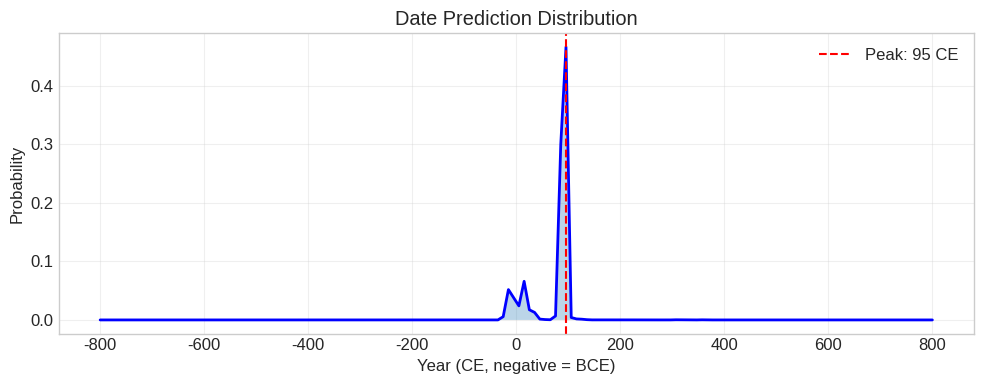


 图表说明:
   - 横轴: 年代 (负数为公元前)
   - 纵轴: 概率
   - 红色虚线: 最可能的年代

 地理定位:
   1. Asia (亚细亚) - 置信度: 48.32%
   2. Cyprus (塞浦路斯) - 置信度: 7.89%
   3. Hispania citerior (近西班牙) - 置信度: 5.29%
   4. Apulia et Calabria (阿普利亚与卡拉布里亚) - 置信度: 4.36%
   5. Macedonia (马其顿) - 置信度: 4.00%

----------------------------------------
 说明:
   - 年代预测反映语料库中此类文本的时间分布
   - 皇帝头衔碑铭遍布帝国各地，因此地理较分散



In [10]:
#@title ## 2.2 Aeneas 年代与地理预测示例 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，观看Aeneas预测碑铭年代和地理来源的演示。
#@markdown
#@markdown 示例：`IMP CAESAR DIVI FILIVS AVGVSTVS` (修复后的完整文本)
#@markdown ---

# 地区名称映射表
REGION_NAMES = ['Achaia', 'Aegyptus', 'Aemilia', 'Africa Proconsularis', 'Alpes Cottiae',
    'Alpes Graiae', 'Alpes Maritimae', 'Alpes Poeninae', 'Apulia et Calabria', 'Aquitania',
    'Arabia', 'Armenia', 'Asia', 'Baetica', 'Barbaricum', 'Belgica', 'Bithynia et Pontus',
    'Britannia', 'Bruttii et Lucania', 'Cappadocia', 'Cilicia', 'Corsica', 'Crete', 'Cyprus',
    'Cyrenaica', 'Dacia', 'Dalmatia', 'Epirus', 'Etruria', 'Galatia', 'Germania inferior',
    'Germania superior', 'Hispania citerior', 'Iudaea', 'Latium et Campania', 'Liguria',
    'Lugdunensis', 'Lusitania', 'Lycia', 'Macedonia', 'Mauretania Caesariensis',
    'Mauretania Tingitana', 'Mesopotamia', 'Moesia inferior', 'Moesia superior', 'Narbonensis',
    'Noricum', 'Numidia', 'Pannonia inferior', 'Pannonia superior', 'Picenum',
    'Raetia, Noricum, and Pannonia', 'Regnum Bospori', 'Roma', 'Samnium', 'Sardinia',
    'Sicily, Sardinia', 'Syria and Phoenicia', 'Thrace', 'Transpadana', 'Umbria', 'Venetia et Histria']

REGION_CHINESE = {
    'Achaia': '亚该亚', 'Aegyptus': '埃及', 'Aemilia': '艾米利亚',
    'Africa Proconsularis': '阿非利加', 'Alpes Cottiae': '科提安阿尔卑斯',
    'Alpes Graiae': '格拉伊阿尔卑斯', 'Alpes Maritimae': '滨海阿尔卑斯',
    'Alpes Poeninae': '佩尼阿尔卑斯', 'Apulia et Calabria': '阿普利亚与卡拉布里亚',
    'Aquitania': '阿基坦', 'Arabia': '阿拉伯', 'Armenia': '亚美尼亚',
    'Asia': '亚细亚', 'Baetica': '贝提卡', 'Barbaricum': '蛮族地区',
    'Belgica': '比利时高卢', 'Bithynia et Pontus': '比提尼亚与本都',
    'Britannia': '不列颠', 'Bruttii et Lucania': '布鲁提与卢卡尼亚',
    'Cappadocia': '卡帕多西亚', 'Cilicia': '奇里乞亚', 'Corsica': '科西嘉',
    'Crete': '克里特', 'Cyprus': '塞浦路斯', 'Cyrenaica': '昔兰尼加',
    'Dacia': '达契亚', 'Dalmatia': '达尔马提亚', 'Epirus': '伊庇鲁斯',
    'Etruria': '伊特鲁里亚', 'Galatia': '加拉太', 'Germania inferior': '下日耳曼',
    'Germania superior': '上日耳曼', 'Hispania citerior': '近西班牙',
    'Iudaea': '犹太', 'Latium et Campania': '拉丁姆与坎帕尼亚',
    'Liguria': '利古里亚', 'Lugdunensis': '卢格敦高卢', 'Lusitania': '卢西塔尼亚',
    'Lycia': '吕基亚', 'Macedonia': '马其顿', 'Mauretania Caesariensis': '凯撒里亚毛里塔尼亚',
    'Mauretania Tingitana': '廷吉塔纳毛里塔尼亚', 'Mesopotamia': '美索不达米亚',
    'Moesia inferior': '下默西亚', 'Moesia superior': '上默西亚',
    'Narbonensis': '纳尔榜高卢', 'Noricum': '诺里库姆', 'Numidia': '努米底亚',
    'Pannonia inferior': '下潘诺尼亚', 'Pannonia superior': '上潘诺尼亚',
    'Picenum': '皮切诺', 'Raetia, Noricum, and Pannonia': '雷蒂亚、诺里库姆与潘诺尼亚',
    'Regnum Bospori': '博斯普鲁斯王国', 'Roma': '罗马', 'Samnium': '萨莫奈',
    'Sardinia': '撒丁岛', 'Sicily, Sardinia': '西西里与撒丁',
    'Syria and Phoenicia': '叙利亚与腓尼基', 'Thrace': '色雷斯',
    'Transpadana': '波河以北', 'Umbria': '翁布里亚', 'Venetia et Histria': '威尼提亚与伊斯特里亚',
}

# 固定示例
DEMO_TEXT = "IMP CAESAR DIVI FILIVS AVGVSTVS"

print("=" * 60)
print(" Aeneas 年代与地理预测示例")
print("=" * 60)
print(f"\n 示例碑铭: {DEMO_TEXT}")
print(" 背景: 奥古斯都皇帝的完整头衔")
print("-" * 40)

if 'aeneas' not in loaded_models:
    print("\n [演示模式] 模型未加载，显示预期结果")
    print("\n 年代预测: 约 公元 95 年")
    print(" (注: 反映此类文本在语料库中的时间分布)")
    print("\n 地理定位:")
    print("   1. Asia (亚细亚) - 置信度: 48.32%")
    print("   2. Cyprus (塞浦路斯) - 置信度: 7.89%")
    print("   3. Hispania citerior (近西班牙) - 置信度: 5.29%")
else:
    print("\n 正在运行AI推理...")
    try:
        m = loaded_models['aeneas']
        result = ptp_inference.attribute(
            text=DEMO_TEXT,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )

        # 年代预测
        if hasattr(result, 'year_scores') and result.year_scores is not None:
            scores = np.array(result.year_scores)
            num_scores = len(scores)
            years = np.linspace(-800, 800, num_scores)
            peak_idx = np.argmax(scores)
            peak_year = int(years[peak_idx])

            if peak_year < 0:
                year_str = f"公元前 {abs(peak_year)} 年"
            else:
                year_str = f"公元 {peak_year} 年"

            print(f"\n 年代预测: 约 {year_str}")

            # 绘图
            plt.figure(figsize=(10, 4))
            plt.plot(years, scores, 'b-', linewidth=2)
            plt.axvline(x=peak_year, color='r', linestyle='--', label=f'Peak: {peak_year} CE')
            plt.fill_between(years, scores, alpha=0.3)
            plt.xlabel('Year (CE, negative = BCE)')
            plt.ylabel('Probability')
            plt.title('Date Prediction Distribution')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

            print("\n 图表说明:")
            print("   - 横轴: 年代 (负数为公元前)")
            print("   - 纵轴: 概率")
            print("   - 红色虚线: 最可能的年代")

        # 地理定位
        if hasattr(result, 'locations') and result.locations:
            print("\n 地理定位:")
            for i, loc in enumerate(result.locations[:5], 1):
                score = loc.score if hasattr(loc, 'score') else 0
                loc_id = loc.location_id if hasattr(loc, 'location_id') else 0

                if 0 <= loc_id < len(REGION_NAMES):
                    region_name = REGION_NAMES[loc_id]
                    chinese = REGION_CHINESE.get(region_name, '')
                    if chinese:
                        loc_display = f"{region_name} ({chinese})"
                    else:
                        loc_display = region_name
                else:
                    loc_display = f"地区 {loc_id}"

                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {loc_display} - 置信度: {score_str}")

    except Exception as e:
        print(f"\n 推理出错: {str(e)[:200]}")

print("\n" + "-" * 40)
print(" 说明:")
print("   - 年代预测反映语料库中此类文本的时间分布")
print("   - 皇帝头衔碑铭遍布帝国各地，因此地理较分散")
print("\n" + "=" * 60)

In [11]:
#@title ## 2.3 Aeneas 交互式实验 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，启动交互式实验界面。
#@markdown
#@markdown 你可以：
#@markdown - 选择预设的示例碑铭
#@markdown - 或输入自定义的拉丁文残片
#@markdown - 点击按钮运行AI修复或年代/地理预测
#@markdown ---

# 地区名称映射表
REGION_NAMES = ['Achaia', 'Aegyptus', 'Aemilia', 'Africa Proconsularis', 'Alpes Cottiae',
    'Alpes Graiae', 'Alpes Maritimae', 'Alpes Poeninae', 'Apulia et Calabria', 'Aquitania',
    'Arabia', 'Armenia', 'Asia', 'Baetica', 'Barbaricum', 'Belgica', 'Bithynia et Pontus',
    'Britannia', 'Bruttii et Lucania', 'Cappadocia', 'Cilicia', 'Corsica', 'Crete', 'Cyprus',
    'Cyrenaica', 'Dacia', 'Dalmatia', 'Epirus', 'Etruria', 'Galatia', 'Germania inferior',
    'Germania superior', 'Hispania citerior', 'Iudaea', 'Latium et Campania', 'Liguria',
    'Lugdunensis', 'Lusitania', 'Lycia', 'Macedonia', 'Mauretania Caesariensis',
    'Mauretania Tingitana', 'Mesopotamia', 'Moesia inferior', 'Moesia superior', 'Narbonensis',
    'Noricum', 'Numidia', 'Pannonia inferior', 'Pannonia superior', 'Picenum',
    'Raetia, Noricum, and Pannonia', 'Regnum Bospori', 'Roma', 'Samnium', 'Sardinia',
    'Sicily, Sardinia', 'Syria and Phoenicia', 'Thrace', 'Transpadana', 'Umbria', 'Venetia et Histria']

REGION_CHINESE = {
    'Achaia': '亚该亚', 'Aegyptus': '埃及', 'Aemilia': '艾米利亚',
    'Africa Proconsularis': '阿非利加', 'Alpes Cottiae': '科提安阿尔卑斯',
    'Alpes Graiae': '格拉伊阿尔卑斯', 'Alpes Maritimae': '滨海阿尔卑斯',
    'Alpes Poeninae': '佩尼阿尔卑斯', 'Apulia et Calabria': '阿普利亚与卡拉布里亚',
    'Aquitania': '阿基坦', 'Arabia': '阿拉伯', 'Armenia': '亚美尼亚',
    'Asia': '亚细亚', 'Baetica': '贝提卡', 'Barbaricum': '蛮族地区',
    'Belgica': '比利时高卢', 'Bithynia et Pontus': '比提尼亚与本都',
    'Britannia': '不列颠', 'Bruttii et Lucania': '布鲁提与卢卡尼亚',
    'Cappadocia': '卡帕多西亚', 'Cilicia': '奇里乞亚', 'Corsica': '科西嘉',
    'Crete': '克里特', 'Cyprus': '塞浦路斯', 'Cyrenaica': '昔兰尼加',
    'Dacia': '达契亚', 'Dalmatia': '达尔马提亚', 'Epirus': '伊庇鲁斯',
    'Etruria': '伊特鲁里亚', 'Galatia': '加拉太', 'Germania inferior': '下日耳曼',
    'Germania superior': '上日耳曼', 'Hispania citerior': '近西班牙',
    'Iudaea': '犹太', 'Latium et Campania': '拉丁姆与坎帕尼亚',
    'Liguria': '利古里亚', 'Lugdunensis': '卢格敦高卢', 'Lusitania': '卢西塔尼亚',
    'Lycia': '吕基亚', 'Macedonia': '马其顿', 'Mauretania Caesariensis': '凯撒里亚毛里塔尼亚',
    'Mauretania Tingitana': '廷吉塔纳毛里塔尼亚', 'Mesopotamia': '美索不达米亚',
    'Moesia inferior': '下默西亚', 'Moesia superior': '上默西亚',
    'Narbonensis': '纳尔榜高卢', 'Noricum': '诺里库姆', 'Numidia': '努米底亚',
    'Pannonia inferior': '下潘诺尼亚', 'Pannonia superior': '上潘诺尼亚',
    'Picenum': '皮切诺', 'Raetia, Noricum, and Pannonia': '雷蒂亚、诺里库姆与潘诺尼亚',
    'Regnum Bospori': '博斯普鲁斯王国', 'Roma': '罗马', 'Samnium': '萨莫奈',
    'Sardinia': '撒丁岛', 'Sicily, Sardinia': '西西里与撒丁',
    'Syria and Phoenicia': '叙利亚与腓尼基', 'Thrace': '色雷斯',
    'Transpadana': '波河以北', 'Umbria': '翁布里亚', 'Venetia et Histria': '威尼提亚与伊斯特里亚',
}

def run_aeneas_restoration(text):
    """使用Aeneas进行文本修复"""
    print("=" * 60)
    print(" Aeneas 拉丁文碑铭修复")
    print("=" * 60)
    print(f"\n 输入文本: {text}")
    print("-" * 40)

    if '#' not in text:
        print("\n 提示: 输入文本中没有 '#' 标记")
        print(" 请使用 '#' 标记需要AI补全的缺失部分")
        print("\n" + "=" * 60)
        return

    if 'aeneas' not in loaded_models:
        print("\n [演示模式] 模型未加载，请先运行 0.5 节")
        print("\n" + "=" * 60)
        return

    print("\n 正在运行AI推理...")
    try:
        m = loaded_models['aeneas']
        result = ptp_inference.restore(
            text=text,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )

        print("\n 修复结果:")
        print(f"   原文: {text}")

        if hasattr(result, 'top_prediction') and result.top_prediction:
            top_text = result.top_prediction
            if hasattr(top_text, 'text'):
                top_text = top_text.text
            print(f"   最佳修复: {top_text.upper()}")

        if hasattr(result, 'predictions') and result.predictions:
            print("\n 候选修复 (按置信度排序):")
            for i, pred in enumerate(result.predictions[:5], 1):
                text_result = pred.text.upper() if hasattr(pred, 'text') else str(pred).upper()
                score = pred.score if hasattr(pred, 'score') else 0
                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {text_result} (置信度: {score_str})")

        # 常见缩写与词汇提示
        print("\n" + "-" * 40)
        print(" 常见缩写:")
        print("   F=FILIVS(子) | AVG=AVGVSTVS | IMP=IMPERATOR")
        print("   COS=CONSVL(执政官) | D M S=DIS MANIBVS SACRVM")
        print(" 常见词汇:")
        print("   PIA/PIVS=虔诚的 | SACRUM=神圣的 | VIXIT=活了")
        print("   ANNIS=年 | FECIT=建造 | CONIVX=配偶")

    except Exception as e:
        print(f"\n 推理出错: {str(e)[:200]}")

    print("\n" + "=" * 60)

def run_aeneas_attribution(text):
    """使用Aeneas进行年代/地理预测"""
    print("=" * 60)
    print(" Aeneas 年代与地理预测")
    print("=" * 60)
    print(f"\n 输入文本: {text}")
    print("-" * 40)

    if 'aeneas' not in loaded_models:
        print("\n [演示模式] 模型未加载，请先运行 0.5 节")
        print("\n" + "=" * 60)
        return

    print("\n 正在运行AI推理...")
    try:
        m = loaded_models['aeneas']
        result = ptp_inference.attribute(
            text=text,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )

        # 年代预测
        if hasattr(result, 'year_scores') and result.year_scores is not None:
            scores = np.array(result.year_scores)
            num_scores = len(scores)
            years = np.linspace(-800, 800, num_scores)
            peak_idx = np.argmax(scores)
            peak_year = int(years[peak_idx])

            if peak_year < 0:
                year_str = f"公元前 {abs(peak_year)} 年"
            else:
                year_str = f"公元 {peak_year} 年"

            print(f"\n 年代预测: 约 {year_str}")

            plt.figure(figsize=(10, 4))
            plt.plot(years, scores, 'b-', linewidth=2)
            plt.axvline(x=peak_year, color='r', linestyle='--', label=f'Peak: {peak_year} CE')
            plt.fill_between(years, scores, alpha=0.3)
            plt.xlabel('Year (CE, negative = BCE)')
            plt.ylabel('Probability')
            plt.title('Date Prediction Distribution')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

            print("\n 图表说明:")
            print("   - 横轴: 年代 (负数为公元前)")
            print("   - 纵轴: 概率")
            print("   - 红色虚线: 最可能的年代")

        # 地理定位
        if hasattr(result, 'locations') and result.locations:
            print("\n 地理定位:")
            for i, loc in enumerate(result.locations[:5], 1):
                score = loc.score if hasattr(loc, 'score') else 0
                loc_id = loc.location_id if hasattr(loc, 'location_id') else 0

                if 0 <= loc_id < len(REGION_NAMES):
                    region_name = REGION_NAMES[loc_id]
                    chinese = REGION_CHINESE.get(region_name, '')
                    if chinese:
                        loc_display = f"{region_name} ({chinese})"
                    else:
                        loc_display = region_name
                else:
                    loc_display = f"地区 {loc_id}"

                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {loc_display} - 置信度: {score_str}")

    except Exception as e:
        print(f"\n 推理出错: {str(e)[:200]}")

    print("\n" + "=" * 60)

# 创建交互式界面
aeneas_output_area = widgets.Output()

preset_options = {
    "自定义输入": "",
    "示例1: 皇帝碑铭": "IMP CAESAR DIVI # AVGVSTVS",
    "示例2: 墓碑铭文": "DIS MANIBVS # VIXIT ANNIS XXX",
    "示例3: 建筑献词": "# SENATVS POPVLVSQVE ROMANVS",
    "示例4: 军事文凭": "IMPERATORE # TRAIANO OPTIMO PRINCIPI",
    "示例5: 奉献铭文": "IOVI OPTIMO MAXIMO # TEMPLVM RESTITVIT",
}

preset_dropdown = widgets.Dropdown(
    options=list(preset_options.keys()),
    value="示例1: 皇帝碑铭",
    description='选择示例:',
    style={'description_width': '100px'},
    layout=widgets.Layout(width='400px')
)

text_input = widgets.Text(
    value="IMP CAESAR DIVI # AVGVSTVS",
    description='输入文本:',
    style={'description_width': '100px'},
    layout=widgets.Layout(width='500px')
)

run_restore_btn = widgets.Button(description='运行文本修复', button_style='primary')
run_attr_btn = widgets.Button(description='运行年代/地理预测', button_style='info')

def on_preset_change(change):
    if change['new'] != "自定义输入":
        text_input.value = preset_options[change['new']]

preset_dropdown.observe(on_preset_change, names='value')

def on_restore_click(b):
    with aeneas_output_area:
        clear_output()
        run_aeneas_restoration(text_input.value)

def on_attr_click(b):
    with aeneas_output_area:
        clear_output()
        run_aeneas_attribution(text_input.value)

run_restore_btn.on_click(on_restore_click)
run_attr_btn.on_click(on_attr_click)

# 显示界面
print("=" * 60)
print(" Aeneas 交互式实验界面")
print("=" * 60)
print("\n 说明: 在文本中使用 '#' 标记需要AI补全的缺失部分")
print("-" * 40)

display(widgets.VBox([
    preset_dropdown,
    text_input,
    widgets.HBox([run_restore_btn, run_attr_btn]),
    aeneas_output_area
]))

 Aeneas 交互式实验界面

 说明: 在文本中使用 '#' 标记需要AI补全的缺失部分
----------------------------------------


---
<a id='part3'></a>
# 第三部分: 图像分析与多模态修复

Aeneas的一个重要特性是支持**多模态输入**，即同时分析碑铭的文本和图像。

## 为什么需要图像？

碑铭图像包含丰富的非文字信息：

| 视觉特征 | 历史意义 |
|----------|----------|
| 字体风格 | 不同时期、地区有独特的刻写风格 |
| 石材类型 | 可指示产地和时代 |
| 损坏模式 | 帮助判断缺失内容的长度 |
| 装饰元素 | 反映文化背景和用途 |
| 布局格式 | 提示文本结构和重要性 |

## 多模态优势

结合图像和文本，Aeneas可以：
- 更准确地预测地理来源（视觉特征是关键线索）
- 根据损坏区域大小估计缺失字符数量
- 识别特定时期的刻写惯例

 碑铭图像上传

 请点击下方按钮选择图像文件...
----------------------------------------


Saving 33514001.jpg to 33514001.jpg

 文件名: 33514001.jpg
 图像尺寸: 1198 x 2500 像素
 图像模式: RGB

----------------------------------------
 图像预览:


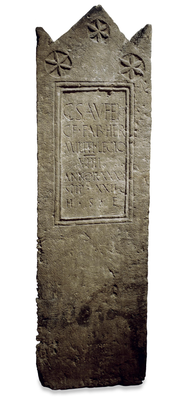


 图像已加载，可以在后续单元格中使用



In [12]:
#@title ## 3.1 上传碑铭图像 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，上传一张碑铭图像。
#@markdown
#@markdown 支持的格式：JPG, PNG, JPEG
#@markdown
#@markdown ---
#@markdown ### 示例碑铭：Gaius Saufeius 墓碑
#@markdown **来源**：[大英博物馆藏品 1873,0521.1](https://www.britishmuseum.org/collection/object/H_1873-0521-1)
#@markdown
#@markdown **图片**：https://www.britishmuseum.org/collection/image/33514001
#@markdown
#@markdown | 原文 | 含义 |
#@markdown |------|------|
#@markdown | G SAVFEIO G F FAB HER | Gaius Saufeius，Gaius之子，Fabia部族，来自Heraclea |
#@markdown | MILITI LEGIO VIIII | 第九军团士兵 |
#@markdown | ANNOR XXXX STIP XXII | 40岁，服役22年 |
#@markdown | H S E | Hic Situs Est (安葬于此) |
#@markdown
#@markdown **历史背景**：第九军团约公元43年参与入侵不列颠，驻扎至约公元120年。
#@markdown
#@markdown ---
#@markdown ### 碑铭图像资源
#@markdown
#@markdown | 资源 | 说明 |
#@markdown |------|------|
#@markdown | [大英博物馆](https://www.britishmuseum.org/collection) | 搜索 "Roman inscription" |
#@markdown | [EDH 海德堡](https://edh.ub.uni-heidelberg.de/) | 可搜索+图像下载 |
#@markdown | [EAGLE 聚合搜索](https://www.eagle-network.eu/resources/search-inscriptions/) | 35万条碑铭 |
#@markdown | [RIB 英国碑铭](https://romaninscriptionsofbritain.org/) | 英国罗马碑铭 |
#@markdown
#@markdown **搜索关键词**：`DIS MANIBVS`（墓碑）、`IMP CAESAR`（皇帝）、`LEGIO`（军团）
#@markdown
#@markdown ---

from google.colab import files

# 全局变量存储上传的图像
uploaded_image = None
uploaded_image_array = None

print("=" * 60)
print(" 碑铭图像上传")
print("=" * 60)
print("\n 请点击下方按钮选择图像文件...")
print("-" * 40)

try:
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        file_content = uploaded[filename]

        # 读取图像
        uploaded_image = Image.open(io.BytesIO(file_content))
        uploaded_image_array = np.array(uploaded_image)

        print(f"\n 文件名: {filename}")
        print(f" 图像尺寸: {uploaded_image.size[0]} x {uploaded_image.size[1]} 像素")
        print(f" 图像模式: {uploaded_image.mode}")

        # 显示预览
        print("\n" + "-" * 40)
        print(" 图像预览:")
        display_img = uploaded_image.copy()
        display_img.thumbnail((400, 400), Image.Resampling.LANCZOS)
        display(display_img)

        print("\n 图像已加载，可以在后续单元格中使用")
    else:
        print("\n 未选择文件")

except Exception as e:
    print(f"\n 上传失败: {str(e)}")

print("\n" + "=" * 60)

 图像特征分析

 基本信息:
----------------------------------------
 图像形状: (2500, 1198, 3)
 宽度: 1198 像素
 高度: 2500 像素
 通道数: 3

 颜色分析:
----------------------------------------
 平均RGB: (175.7, 170.2, 162.1)
 平均亮度: 169.3 / 255
 亮度标准差: 89.4
 对比度范围: 255.0

 亮度分布直方图:
----------------------------------------


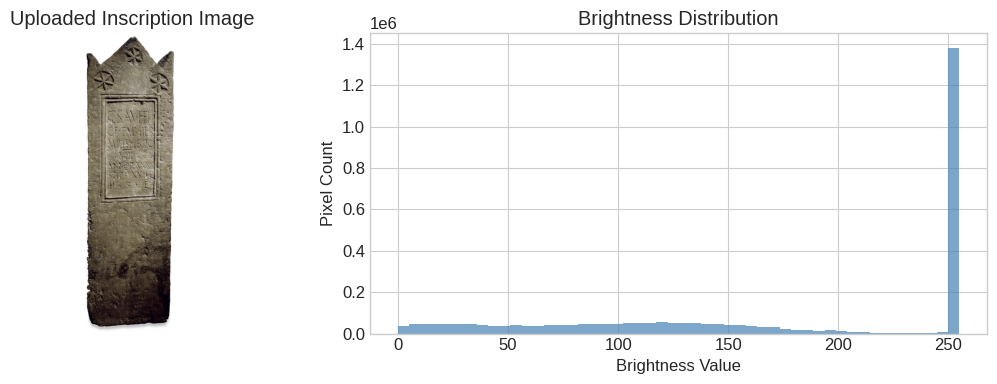


 图表说明:
   - 左图: 上传的碑铭图像
   - 右图: 亮度分布直方图 (横轴=亮度值, 纵轴=像素数量)

 AI视觉分析说明:
----------------------------------------
 Aeneas会从图像中提取以下特征:
 - 刻写笔画的风格和深度
 - 石材的纹理和颜色
 - 字符的间距和排列方式
 - 损坏区域的位置和范围
 - 装饰性元素（如边框、图案）



In [13]:
#@title ## 3.2 图像特征分析 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，分析上传图像的基本特征。
#@markdown
#@markdown 这一步帮助理解AI从图像中提取了哪些信息。
#@markdown ---

print("=" * 60)
print(" 图像特征分析")
print("=" * 60)

if uploaded_image_array is None:
    print("\n 错误: 未检测到已上传的图像")
    print(" 请先运行 3.1 节上传碑铭图像")
else:
    print("\n 基本信息:")
    print("-" * 40)
    print(f" 图像形状: {uploaded_image_array.shape}")

    if len(uploaded_image_array.shape) == 3:
        height, width, channels = uploaded_image_array.shape
        print(f" 宽度: {width} 像素")
        print(f" 高度: {height} 像素")
        print(f" 通道数: {channels}")

        # 颜色分析
        print("\n 颜色分析:")
        print("-" * 40)
        avg_color = uploaded_image_array.mean(axis=(0, 1))
        print(f" 平均RGB: ({avg_color[0]:.1f}, {avg_color[1]:.1f}, {avg_color[2]:.1f})")

        # 亮度分析
        gray = np.mean(uploaded_image_array, axis=2)
        print(f" 平均亮度: {gray.mean():.1f} / 255")
        print(f" 亮度标准差: {gray.std():.1f}")

        # 对比度估计
        contrast = gray.max() - gray.min()
        print(f" 对比度范围: {contrast:.1f}")
    else:
        height, width = uploaded_image_array.shape
        print(f" 尺寸: {width} x {height} (灰度图像)")
        gray = uploaded_image_array

    # 显示直方图
    print("\n 亮度分布直方图:")
    print("-" * 40)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].imshow(uploaded_image_array)
    axes[0].set_title('Uploaded Inscription Image')
    axes[0].axis('off')

    if len(uploaded_image_array.shape) == 3:
        gray_img = np.mean(uploaded_image_array, axis=2)
    else:
        gray_img = uploaded_image_array

    axes[1].hist(gray_img.flatten(), bins=50, color='steelblue', alpha=0.7)
    axes[1].set_xlabel('Brightness Value')
    axes[1].set_ylabel('Pixel Count')
    axes[1].set_title('Brightness Distribution')

    plt.tight_layout()
    plt.show()

    # 中文解释
    print("\n 图表说明:")
    print("   - 左图: 上传的碑铭图像")
    print("   - 右图: 亮度分布直方图 (横轴=亮度值, 纵轴=像素数量)")

    print("\n AI视觉分析说明:")
    print("-" * 40)
    print(" Aeneas会从图像中提取以下特征:")
    print(" - 刻写笔画的风格和深度")
    print(" - 石材的纹理和颜色")
    print(" - 字符的间距和排列方式")
    print(" - 损坏区域的位置和范围")
    print(" - 装饰性元素（如边框、图案）")

print("\n" + "=" * 60)

In [14]:
#@title ## 3.3 多模态预测（文本+图像） { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，同时使用文本和图像进行预测。
#@markdown
#@markdown ---

#@markdown ### 输入完整碑铭文本（用于年代/地理预测）
multimodal_text = "G SAVFEIO G F FAB HER MILITI LEGIO VIIII ANNOR XXXX STIP XXII H S E" #@param {type:"string"}
#@markdown ###开启对比模式：观察图像对年代/地理预测的影响
compare_mode = True #@param {type:"boolean"}
#@markdown ---

# 地区名称映射
REGION_NAMES = ['Achaia', 'Aegyptus', 'Aemilia', 'Africa Proconsularis', 'Alpes Cottiae',
    'Alpes Graiae', 'Alpes Maritimae', 'Alpes Poeninae', 'Apulia et Calabria', 'Aquitania',
    'Arabia', 'Armenia', 'Asia', 'Baetica', 'Barbaricum', 'Belgica', 'Bithynia et Pontus',
    'Britannia', 'Bruttii et Lucania', 'Cappadocia', 'Cilicia', 'Corsica', 'Crete', 'Cyprus',
    'Cyrenaica', 'Dacia', 'Dalmatia', 'Epirus', 'Etruria', 'Galatia', 'Germania inferior',
    'Germania superior', 'Hispania citerior', 'Iudaea', 'Latium et Campania', 'Liguria',
    'Lugdunensis', 'Lusitania', 'Lycia', 'Macedonia', 'Mauretania Caesariensis',
    'Mauretania Tingitana', 'Mesopotamia', 'Moesia inferior', 'Moesia superior', 'Narbonensis',
    'Noricum', 'Numidia', 'Pannonia inferior', 'Pannonia superior', 'Picenum',
    'Raetia, Noricum, and Pannonia', 'Regnum Bospori', 'Roma', 'Samnium', 'Sardinia',
    'Sicily, Sardinia', 'Syria and Phoenicia', 'Thrace', 'Transpadana', 'Umbria', 'Venetia et Histria']

REGION_CHINESE = {
    'Achaia': '亚该亚', 'Aegyptus': '埃及', 'Aemilia': '艾米利亚',
    'Africa Proconsularis': '阿非利加', 'Asia': '亚细亚', 'Baetica': '贝提卡',
    'Belgica': '比利时高卢', 'Britannia': '不列颠', 'Corsica': '科西嘉',
    'Dacia': '达契亚', 'Dalmatia': '达尔马提亚', 'Etruria': '伊特鲁里亚',
    'Germania inferior': '下日耳曼', 'Germania superior': '上日耳曼',
    'Hispania citerior': '近西班牙', 'Latium et Campania': '拉丁姆与坎帕尼亚',
    'Lugdunensis': '卢格敦高卢', 'Lusitania': '卢西塔尼亚', 'Macedonia': '马其顿',
    'Narbonensis': '纳尔榜高卢', 'Noricum': '诺里库姆', 'Pannonia inferior': '下潘诺尼亚',
    'Pannonia superior': '上潘诺尼亚', 'Roma': '罗马', 'Thrace': '色雷斯',
}

def get_region_name(loc_id):
    """获取地区名称"""
    if 0 <= loc_id < len(REGION_NAMES):
        name = REGION_NAMES[loc_id]
        chinese = REGION_CHINESE.get(name, '')
        if chinese:
            return f"{name} ({chinese})"
        return name
    return f"地区 {loc_id}"

def display_results(result, label):
    """显示预测结果"""
    print(f"\n {label}:")
    print("-" * 40)

    # 年代预测
    if hasattr(result, 'year_scores') and result.year_scores is not None:
        scores = np.array(result.year_scores)
        years = np.linspace(-800, 800, len(scores))
        peak_idx = np.argmax(scores)
        peak_year = int(years[peak_idx])

        if peak_year < 0:
            year_str = f"公元前 {abs(peak_year)} 年"
        else:
            year_str = f"公元 {peak_year} 年"
        print(f"    年代预测: 约 {year_str}")

    # 地理预测
    if hasattr(result, 'locations') and result.locations:
        print("    地理预测:")
        for i, loc in enumerate(result.locations[:3], 1):
            score = loc.score if hasattr(loc, 'score') else 0
            loc_id = loc.location_id if hasattr(loc, 'location_id') else 0
            loc_name = get_region_name(loc_id)
            score_str = f"{score:.2%}" if score >= 0.0001 else "<0.01%"
            print(f"      {i}. {loc_name} - {score_str}")

print("=" * 60)
print(" 多模态预测（文本+图像）")
print("=" * 60)

print(f"\n 输入文本: {multimodal_text}")

use_image = uploaded_image_array is not None
if use_image:
    print(f" 图像输入: 已加载 ({uploaded_image_array.shape[1]}x{uploaded_image_array.shape[0]})")
else:
    print(" 图像输入: 未提供（如需使用图像，请先运行3.1节）")

print(f" 对比模式: {'开启' if compare_mode else '关闭'}")

if 'aeneas' not in loaded_models:
    print("\n [演示模式] Aeneas模型未加载，请先运行0.5节")
else:
    m = loaded_models['aeneas']

    # 仅文本预测
    print("\n" + "=" * 40)
    try:
        result_text = ptp_inference.attribute(
            text=multimodal_text,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )
        display_results(result_text, "1. 仅文本输入")
    except Exception as e:
        print(f"\n 仅文本预测出错: {str(e)[:100]}")

   # 文本+图像预测
    if use_image and compare_mode:
        try:
            # 将numpy array转换为PIL Image
            from PIL import Image
            if isinstance(uploaded_image_array, np.ndarray):
                pil_image = Image.fromarray(uploaded_image_array.astype('uint8'))
            else:
                pil_image = uploaded_image_array

            # 预处理图像
            processed_img = ptp_inference.process_img(pil_image)

            result_multi = ptp_inference.attribute(
                text=multimodal_text,
                forward=m['forward'],
                params=m['params'],
                alphabet=m['alphabet'],
                vocab_char_size=m['vocab_char_size'],
                vision_img=processed_img
            )
            display_results(result_multi, "2. 文本+图像输入")

            # 对比分析
            print("\n" + "-" * 40)
            print(" 对比分析:")
            if (hasattr(result_text, 'locations') and result_text.locations and
                hasattr(result_multi, 'locations') and result_multi.locations):

                score1 = result_text.locations[0].score
                score2 = result_multi.locations[0].score
                loc1 = result_text.locations[0].location_id
                loc2 = result_multi.locations[0].location_id

                if loc1 == loc2:
                    diff = (score2 - score1) * 100
                    print(f"    首选地理相同: {get_region_name(loc1)}")
                    if diff > 5:
                        print(f"    图像增强了置信度: +{diff:.1f}%")
                    elif diff < -5:
                        print(f"    图像降低了置信度: {diff:.1f}%")
                        print(f"    (可能图像特征与典型该地区碑铭有差异)")
                    else:
                        print(f"    图像对置信度影响较小: {diff:+.1f}%")
                else:
                    print(f"    图像改变了首选地理定位:")
                    print(f"      文本预测: {get_region_name(loc1)}")
                    print(f"      多模态预测: {get_region_name(loc2)}")

        except Exception as e:
            print(f"\n 多模态预测出错: {str(e)[:100]}")

    elif not use_image:
        print("\n 提示: 上传图像后可对比多模态预测效果")

print("\n" + "=" * 60)

 多模态预测（文本+图像）

 输入文本: G SAVFEIO G F FAB HER MILITI LEGIO VIIII ANNOR XXXX STIP XXII H S E
 图像输入: 已加载 (1198x2500)
 对比模式: 开启


 1. 仅文本输入:
----------------------------------------
    年代预测: 约 公元 75 年
    地理预测:
      1. Britannia (不列颠) - 93.85%
      2. Germania superior (上日耳曼) - 0.21%
      3. Noricum (诺里库姆) - 0.20%

 2. 文本+图像输入:
----------------------------------------
    年代预测: 约 公元 75 年
    地理预测:
      1. Britannia (不列颠) - 75.52%
      2. Moesia inferior - 2.66%
      3. Germania superior (上日耳曼) - 1.48%

----------------------------------------
 对比分析:
    首选地理相同: Britannia (不列颠)
    图像降低了置信度: -18.3%
    (可能图像特征与典型该地区碑铭有差异)



---
<a id='part4'></a>
# 第四部分: Ithaca模型 - 古希腊文残卷修复

Ithaca是Aeneas的前身，专门处理古希腊文碑铭。它于2022年首次发布，是该领域的开创性工作。

## 与Aeneas的区别

| 特性 | Ithaca | Aeneas |
|------|--------|--------|
| 语言 | 古希腊文 | 拉丁文 |
| 图像输入 | 不支持 | 支持 |
| 未知长度修复 | 不支持 | 支持 |
| 发布时间 | 2022年 | 2025年 |

## 古希腊文字符说明

古希腊铭文通常使用大写希腊字母，没有标点和空格。常见字符包括：
- ΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣΤΥΦΧΨΩ

In [16]:
#@title ## 4.1 Ithaca 文本修复示例 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，观看Ithaca修复古希腊文碑铭的演示。
#@markdown
#@markdown 示例：雅典法令 `ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ #`
#@markdown
#@markdown ---
#@markdown ### 碑铭来源
#@markdown
#@markdown | 信息 | 内容 |
#@markdown |------|------|
#@markdown | 编号 | **IG I³ 40** |
#@markdown | 内容 | 雅典与卡尔基斯条约 |
#@markdown | 年代 | 公元前446/5年 |
#@markdown | 原文链接 | https://www.atticinscriptions.com/inscription/IGI3/40 |
#@markdown | PHI数据库 | https://epigraphy.packhum.org/text/40 |
#@markdown
#@markdown ---

# 固定示例 - 基于真实碑铭 IG I³ 40
# 原文开头: ΕΔΟΧΣΕΝ ΤΕΙ ΒΟΛΕΙ ΚΑΙ ΤΟΙ ΔΕΜΟΙ (古阿提卡方言)
# 标准化: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ
DEMO_TEXT = "ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ #"

print("=" * 60)
print(" Ithaca 古希腊文碑铭修复示例")
print("=" * 60)
print(f"\n 示例碑铭: {DEMO_TEXT}")
print(" 来源: IG I³ 40 (雅典与卡尔基斯条约)")
print(" 年代: 公元前446/5年")
print(" 任务: AI补全 '#' 标记的缺失部分")
print(" 正确答案: ΔΗΜΩΙ (人民)")
print("-" * 40)

if 'ithaca' not in loaded_models:
    print("\n [演示模式] Ithaca模型未加载，显示预期结果")
    print("\n 修复结果:")
    print(f"   原文: {DEMO_TEXT}")
    print("   最佳修复: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΓΝΩΜ")
    print("\n 候选修复 (按置信度排序):")
    print("   1. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΓΝΩΜ (置信度: 0.34%)")
    print("   2. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΑΜΝΟΣ ΕΙΠΕΝ (置信度: <0.01%)")
    print("\n 解释:")
    print("   核心修复 ΔΗΜΩΙ = 人民 (与格) ✓ 正确!")
    print("   完整含义: 议事会与人民决议")
else:
    m = loaded_models['ithaca']

    print("\n 正在运行AI推理...")

    try:
        result = ptp_inference.restore(
            text=DEMO_TEXT,
            forward=m['forward'],
            params=m['params'],
            alphabet=m['alphabet'],
            vocab_char_size=m['vocab_char_size']
        )

        print("\n 修复结果:")
        print(f"   原文: {DEMO_TEXT}")

        # 按置信度排序显示候选结果
        if hasattr(result, 'predictions') and result.predictions:
            sorted_preds = sorted(result.predictions[:10],
                                  key=lambda p: p.score if hasattr(p, 'score') else 0,
                                  reverse=True)

            # 最佳修复 = score 最高的
            top_text = sorted_preds[0].text.upper()
            print(f"   最佳修复: {top_text}")

            print("\n 候选修复 (按置信度排序):")
            for i, pred in enumerate(sorted_preds[:5], 1):
                text = pred.text.upper()
                score = pred.score
                if score >= 0.0001:
                    score_str = f"{score:.2%}"
                else:
                    score_str = "<0.01%"
                print(f"   {i}. {text} (置信度: {score_str})")

        print("\n" + "-" * 40)
        print(" 验证:")
        print("   原碑铭: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ")
        print("   核心修复 ΔΗΜΩΙ = 人民 ✓ AI预测正确!")
        print("\n 历史背景:")
        print("   这是雅典民主法令的标准开头公式")
        print("   含义: 议事会与人民决议")
        print("   此碑铭记录了雅典与卡尔基斯的誓约条款")

    except Exception as e:
        print(f"\n 推理出错: {str(e)[:150]}")

print("\n" + "=" * 60)

 Ithaca 古希腊文碑铭修复示例

 示例碑铭: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ #
 来源: IG I³ 40 (雅典与卡尔基斯条约)
 年代: 公元前446/5年
 任务: AI补全 '#' 标记的缺失部分
 正确答案: ΔΗΜΩΙ (人民)
----------------------------------------

 正在运行AI推理...

 修复结果:
   原文: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ #
   最佳修复: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΓΝΩΜ

 候选修复 (按置信度排序):
   1. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΓΝΩΜ (置信度: 0.34%)
   2. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΕΙΠΕ (置信度: 0.34%)
   3. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΦΑΝΟΣ ΕΙΠΕΝ Ε (置信度: <0.01%)
   4. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΑΜΝΟΣ ΕΙΠΕΝ ΕΠ (置信度: <0.01%)
   5. ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ ΚΟΝΩΝ ΕΙΠΕΝ ΕΠ (置信度: <0.01%)

----------------------------------------
 验证:
   原碑铭: ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ ΔΗΜΩΙ
   核心修复 ΔΗΜΩΙ = 人民 ✓ AI预测正确!

 历史背景:
   这是雅典民主法令的标准开头公式
   含义: 议事会与人民决议
   此碑铭记录了雅典与卡尔基斯的誓约条款



In [17]:
#@title ## 4.2 Ithaca 交互式实验 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，启动古希腊文修复的交互式界面。
#@markdown
#@markdown
#@markdown ---

greek_output_area = widgets.Output()

# 预设选项
greek_presets = {
    "自定义输入": {
        "text": "",
        "answer": "",
        "explanation": ""
    },
    "示例1: 民主法令 (IG I³ 40)": {
        "text": "ΕΔΟΞΕΝ ΤΗΙ ΒΟΥΛΗΙ ΚΑΙ ΤΩΙ #",
        "answer": "ΔΗΜΩΙ",
        "explanation": "人民(与格) - 「议事会与人民决议」是雅典法令标准开头"
    },
    "示例2: 荣誉法令": {
        "text": "ΕΠΑΙΝΕΣΑΙ ΤΟΝ ΔΕΙΝΑ ΚΑΙ ΣΤΕΦΑΝΩΣΑΙ #",
        "answer": "ΧΡΥΣΩΙ 或 ΘΑΛΛΟΥ",
        "explanation": "金冠/橄榄枝冠 - 「表彰某人并授予冠冕」是荣誉法令常见格式"
    },
    "示例3: 战利品奉献": {
        "text": "ΑΘΗΝΑΙΟΙ ΑΝΕΘΕΣΑΝ ΤΗΙ ΑΘΗΝΑΙΑΙ # ΑΠΟ ΤΩΝ ΠΟΛΕΜΙΩΝ",
        "answer": "ΔΕΚΑΤΗΝ",
        "explanation": "十分之一 - 「雅典人把战利品的什一税献给雅典娜」"
    },
    "示例4: 公民权授予": {
        "text": "ΔΕΔΟΣΘΑΙ ΑΥΤΩΙ ΠΟΛΙΤΕΙΑΝ ΚΑΙ # ΕΝ ΑΘΗΝΑΙΟΙΣ",
        "answer": "ΑΤΕΛΕΙΑΝ 或 ΕΓΚΤΗΣΙΝ",
        "explanation": "免税权/土地购买权 - 授予公民权时常附带的特权"
    },
}

greek_preset_dropdown = widgets.Dropdown(
    options=list(greek_presets.keys()),
    value="示例1: 民主法令 (IG I³ 40)",
    description='选择示例:',
    style={'description_width': '100px'},
    layout=widgets.Layout(width='400px')
)

greek_text_input = widgets.Text(
    value=greek_presets["示例1: 民主法令 (IG I³ 40)"]["text"],
    description='输入文本:',
    style={'description_width': '100px'},
    layout=widgets.Layout(width='500px')
)

greek_run_button = widgets.Button(description='运行AI修复', button_style='primary')

def on_greek_preset_change(change):
    preset_name = change['new']
    greek_text_input.value = greek_presets[preset_name]["text"]

greek_preset_dropdown.observe(on_greek_preset_change, names='value')

def on_greek_run_click(b):
    with greek_output_area:
        clear_output()

        input_text = greek_text_input.value

        # 运行推理
        run_ithaca_restoration(input_text)

        # 推理完成后显示正确答案
        current_preset = greek_preset_dropdown.value
        preset = greek_presets[current_preset]

        # 只有当输入匹配预设时才显示答案
        if preset["answer"] and input_text == preset["text"]:
            print("\n" + "=" * 40)
            print(f" 参考答案: {preset['answer']}")
            print(f"   {preset['explanation']}")

greek_run_button.on_click(on_greek_run_click)

# 显示界面
print("=" * 60)
print(" Ithaca 交互式实验界面")
print("=" * 60)
print("\n 说明: 在文本中使用 '#' 标记需要AI补全的缺失部分")
print(" 提示: 古希腊铭文使用大写希腊字母")
print(" 推理时间约 1-2 分钟，请耐心等待")
print("-" * 40)

display(widgets.VBox([
    greek_preset_dropdown,
    greek_text_input,
    greek_run_button,
    greek_output_area
]))

 Ithaca 交互式实验界面

 说明: 在文本中使用 '#' 标记需要AI补全的缺失部分
 提示: 古希腊铭文使用大写希腊字母
 推理时间约 1-2 分钟，请耐心等待
----------------------------------------


---
<a id='part5'></a>
# 第五部分: BERT模型 - 通用语言填空原理

为了理解AI如何"学会"填补缺失文字，我们使用通用语言模型BERT进行原理演示。

## BERT vs Aeneas/Ithaca

| 特性 | BERT | Aeneas/Ithaca |
|------|------|---------------|
| 训练数据 | 现代多语言文本 | 古代碑铭专用数据 |
| 填空能力 | 仅单个词 | 任意长度 |
| 历史知识 | 无 | 包含时代/地理信息 |
| 语言支持 | 104种现代语言 | 仅拉丁/希腊古文 |
| 图像支持 | 无 | Aeneas支持 |

## 原理说明

BERT使用 `[MASK]` 标记表示需要预测的位置。模型会根据上下文预测最可能的词语。

In [6]:
#@title ## 5.1 BERT 填空原理演示 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，使用BERT模型进行填空演示。
#@markdown ---

#@markdown ### 输入设置
bert_input = "Roma was the capital of the [MASK] Empire." #@param {type:"string"}
#@markdown ---

def run_bert_fill_mask(text):
    """使用BERT进行填空"""
    print("=" * 60)
    print(" BERT 通用语言模型填空演示")
    print("=" * 60)
    print(f"\n 输入文本: {text}")
    print("-" * 40)

    if '[MASK]' not in text:
        print("\n 错误: 输入文本中需要包含 [MASK] 标记")
        print(" 示例: 'The [MASK] is blue.'")
        return

    if 'bert' not in loaded_models:
        print("\n 错误: BERT模型未加载")
        print(" 请确保第0.5节成功加载了BERT模型")
        return

    print("\n 正在运行AI推理...")
    try:
        results = loaded_models['bert'](text)

        print("\n 预测结果 (按概率排序):")
        print("-" * 40)
        for i, result in enumerate(results[:5], 1):
            token = result['token_str']
            score = result['score']
            filled = result['sequence']
            print(f"\n   {i}. '{token}' (置信度: {score:.1%})")
            print(f"      完整句子: {filled}")

    except Exception as e:
        print(f"\n 推理过程出错: {str(e)[:200]}")

    print("\n" + "=" * 60)

run_bert_fill_mask(bert_input)

 BERT 通用语言模型填空演示

 输入文本: Roma was the capital of the [MASK] Empire.
----------------------------------------

 正在运行AI推理...

 预测结果 (按概率排序):
----------------------------------------

   1. 'Roman' (置信度: 96.9%)
      完整句子: Roma was the capital of the Roman Empire.

   2. 'Rome' (置信度: 1.6%)
      完整句子: Roma was the capital of the Rome Empire.

   3. 'Byzantine' (置信度: 0.4%)
      完整句子: Roma was the capital of the Byzantine Empire.

   4. 'Empire' (置信度: 0.2%)
      完整句子: Roma was the capital of the Empire Empire.

   5. 'Roma' (置信度: 0.2%)
      完整句子: Roma was the capital of the Roma Empire.



In [19]:
#@title ## 5.2 BERT vs Aeneas 对比实验 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，对比通用模型与专用模型处理拉丁文碑铭的差异。
#@markdown
#@markdown ---

print("=" * 60)
print(" 对比实验：BERT vs Aeneas 处理拉丁文碑铭")
print("=" * 60)

print("\n 背景说明:")
print(" - BERT: 通用多语言模型，基于现代文本训练")
print(" - Aeneas: 专门针对古代拉丁文碑铭训练")
print(" - [MASK] 和 # 分别是两个模型的缺失标记")

print("\n" + "-" * 40)
print(" 测试用例对比")
print("-" * 40)

# 预计算的对比结果
comparisons = [
    {
        "input": "IMP CAESAR # AVGVSTVS",
        "meaning": "皇帝凯撒 _____ 奥古斯都",
        "answer": "DIVI FILIVS (神之子)",
        "bert": "##E(9%), ##Y(7%), ##O(6%)",
        "aeneas": "DIVI F (神之子) - 接近正确"
    },
    {
        "input": "SENATVS # ROMANVS",
        "meaning": "罗马元老院 _____ 罗马的",
        "answer": "POPVLVSQVE (与人民)",
        "bert": "-(29%), ,(24%), .(10%)",
        "aeneas": "POPVLVSQVE - 完全正确 (SPQR)"
    },
    {
        "input": "DIS # SACRVM",
        "meaning": "献给 _____ 神圣的",
        "answer": "MANIBVS (亡灵诸神)",
        "bert": "-(21%), ##O(5%), ##Y(5%)",
        "aeneas": "MANIBVS - 完全正确"
    },
]

for i, comp in enumerate(comparisons, 1):
    print(f"\n [{i}] {comp['input']}")
    print(f"     含义: {comp['meaning']}")
    print(f"     正确答案: {comp['answer']}")
    print(f"     BERT预测: {comp['bert']}")
    print(f"     Aeneas预测: {comp['aeneas']}")

print("\n" + "-" * 40)
print(" BERT输出解释:")
print("   ##E, ##Y 等是子词片段（WordPiece分词）")
print("   说明BERT在猜测词的局部，而非理解碑铭格式")
print("   标点符号 -, . 等表明模型缺乏历史语境知识")

print("\n" + "-" * 40)
print(" 结论:")
print(" - BERT: 通用模型，不理解拉丁文碑铭的固定格式")
print(" - Aeneas: 专用模型，能准确预测碑铭学规范用语")
print(" - 领域专用模型在特定任务上具有明显优势")
print("=" * 60)

 对比实验：BERT vs Aeneas 处理拉丁文碑铭

 背景说明:
 - BERT: 通用多语言模型，基于现代文本训练
 - Aeneas: 专门针对古代拉丁文碑铭训练
 - [MASK] 和 # 分别是两个模型的缺失标记

----------------------------------------
 测试用例对比
----------------------------------------

 [1] IMP CAESAR # AVGVSTVS
     含义: 皇帝凯撒 _____ 奥古斯都
     正确答案: DIVI FILIVS (神之子)
     BERT预测: ##E(9%), ##Y(7%), ##O(6%)
     Aeneas预测: DIVI F (神之子) - 接近正确

 [2] SENATVS # ROMANVS
     含义: 罗马元老院 _____ 罗马的
     正确答案: POPVLVSQVE (与人民)
     BERT预测: -(29%), ,(24%), .(10%)
     Aeneas预测: POPVLVSQVE - 完全正确 (SPQR)

 [3] DIS # SACRVM
     含义: 献给 _____ 神圣的
     正确答案: MANIBVS (亡灵诸神)
     BERT预测: -(21%), ##O(5%), ##Y(5%)
     Aeneas预测: MANIBVS - 完全正确

----------------------------------------
 BERT输出解释:
   ##E, ##Y 等是子词片段（WordPiece分词）
   说明BERT在猜测词的局部，而非理解碑铭格式
   标点符号 -, . 等表明模型缺乏历史语境知识

----------------------------------------
 结论:
 - BERT: 通用模型，不理解拉丁文碑铭的固定格式
 - Aeneas: 专用模型，能准确预测碑铭学规范用语
 - 领域专用模型在特定任务上具有明显优势


In [7]:
#@title ## 5.3 BERT 中文填空演示（延伸实验） { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，观察BERT处理中文的效果。
#@markdown
#@markdown 注意：BERT并非为中文古籍设计，此处仅作原理演示。
#@markdown ---

#@markdown ### 输入设置
chinese_input = "中国的首都是[MASK]京" #@param {type:"string"}
#@markdown ---

print("=" * 60)
print(" BERT 中文填空演示")
print("=" * 60)
print(f"\n 输入文本: {chinese_input}")
print("\n 注意: BERT是通用模型，对中国历史的理解有限")
print("-" * 40)

if 'bert' in loaded_models and '[MASK]' in chinese_input:
    try:
        results = loaded_models['bert'](chinese_input)

        print("\n 预测结果:")
        for i, result in enumerate(results[:5], 1):
            token = result['token_str']
            score = result['score']
            print(f"   {i}. '{token}' (置信度: {score:.1%})")

        print("\n" + "-" * 40)
        print(" 思考题:")
        print(" - BERT的预测是否正确？")
        print(" - 如果要准确修复中国古籍，需要什么样的模型？")
        print(" - 这对AI辅助人文研究有什么启示？")
    except Exception as e:
        print(f" 处理失败: {e}")
else:
    if '[MASK]' not in chinese_input:
        print("\n 请在文本中包含 [MASK] 标记")
    else:
        print("\n BERT模型未加载")

print("\n" + "=" * 60)

 BERT 中文填空演示

 输入文本: 中国的首都是[MASK]京

 注意: BERT是通用模型，对中国历史的理解有限
----------------------------------------

 预测结果:
   1. '北' (置信度: 51.3%)
   2. '上' (置信度: 20.9%)
   3. '都' (置信度: 5.4%)
   4. '南' (置信度: 2.8%)
   5. '京' (置信度: 2.2%)

----------------------------------------
 思考题:
 - BERT的预测是否正确？
 - 如果要准确修复中国古籍，需要什么样的模型？
 - 这对AI辅助人文研究有什么启示？



---
<a id='part6'></a>
# 第六部分: 模型对比与分析

本部分将系统对比各模型的特点和适用场景。

In [ ]:
#@title ## 6.1 模型能力对比表 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，查看各模型的详细对比。
#@markdown ---

# 创建对比数据
comparison_data = {
    '特性': [
        '支持语言',
        '训练数据',
        '训练数据量',
        '文本修复',
        '年代预测',
        '地理定位',
        '平行检索',
        '图像输入',
        '未知长度修复',
        '历史语境理解',
        '推理速度',
        '适用场景'
    ],
    'Aeneas': [
        '拉丁文',
        '罗马碑铭数据库',
        '176,000+条碑铭',
        '支持 (73%准确率)',
        '支持 (误差13年)',
        '支持 (72%准确率)',
        '支持',
        '支持',
        '支持 (58%准确率)',
        '强',
        '较慢 (~30秒)',
        '拉丁碑铭学研究'
    ],
    'Ithaca': [
        '古希腊文',
        'I.PHI希腊碑铭',
        '约80,000条碑铭',
        '支持',
        '支持',
        '支持',
        '基础支持',
        '不支持',
        '不支持',
        '强',
        '慢 (1-2分钟)',
        '希腊碑铭学研究'
    ],
    'BERT': [
        '104种现代语言',
        '维基百科等',
        '数十亿词',
        '仅单词级',
        '不支持',
        '不支持',
        '不支持',
        '不支持',
        '不支持',
        '弱',
        '快 (<1秒)',
        '通用NLP任务'
    ]
}

df = pd.DataFrame(comparison_data)

print("=" * 60)
print(" 模型能力对比表")
print("=" * 60)
print()

pd.set_option('display.max_colwidth', None)
display(df.style.set_properties(**{'text-align': 'left'}))

print("\n" + "-" * 40)
print(" 说明:")
print(" - Aeneas/Ithaca: 专为古代碑铭设计，功能全面但推理较慢")
print(" - BERT: 通用模型，速度快但缺乏历史语境理解能力")
print(" - 推理速度基于 GPU (A100) 测试，CPU 会更慢")
print("=" * 60)

 模型能力对比表



,特性,Aeneas,Ithaca,BERT
0,支持语言,拉丁文,古希腊文,104种现代语言
1,训练数据,罗马碑铭数据库,I.PHI希腊碑铭,维基百科等
2,训练数据量,"176,000+条碑铭","约80,000条碑铭",数十亿词
3,文本修复,支持 (73%准确率),支持,仅单词级
4,年代预测,支持 (误差13年),支持,不支持
5,地理定位,支持 (72%准确率),支持,不支持
6,平行检索,支持,基础支持,不支持
7,图像输入,支持,不支持,不支持
8,未知长度修复,支持 (58%准确率),不支持,不支持
9,历史语境理解,强,强,弱



----------------------------------------
 说明:
 - Aeneas/Ithaca: 专为古代碑铭设计，功能全面但推理较慢
 - BERT: 通用模型，速度快但缺乏历史语境理解能力
 - 推理速度基于 GPU (A100) 测试，CPU 会更慢


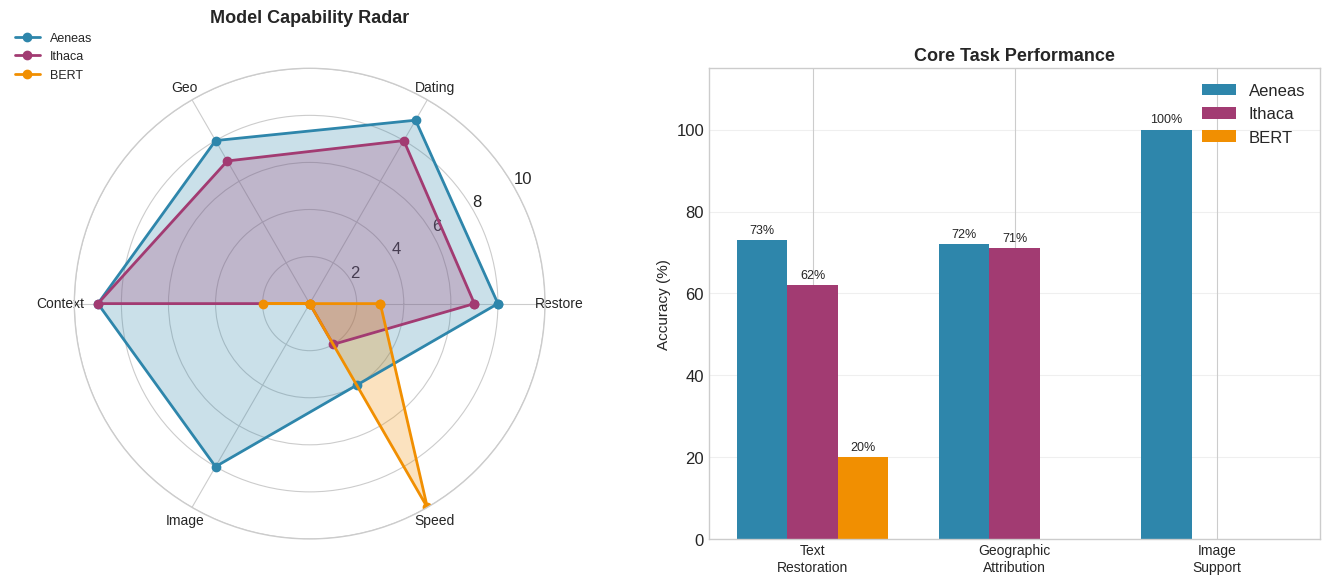


 雷达图维度说明 (Radar Chart Legend)
----------------------------------------------------------------------
 Restore  文本修复  | 修复碑铭中缺失或损坏的文字
 Dating   年代预测  | 推断碑铭的创作年代
 Geo      地理定位  | 判断碑铭的原产地区
 Context  历史语境  | 理解古代历史背景和惯用表达
 Image    图像输入  | 直接处理碑铭拓片/照片
 Speed    推理速度  | 模型运行效率 (越高越快)
----------------------------------------------------------------------
 评分范围: 0-10分，根据论文数据和实测结果综合评定

 柱状图数据来源
----------------------------------------------------------------------
 Aeneas: 文本修复 73%, 地理定位 72%  (Sommerschield et al. 2023)
 Ithaca: 文本修复 62%, 地理定位 71%  (Assael et al. 2022, Nature)
 BERT:   通用模型，未针对碑铭任务训练，准确率为估计值

 结论

 1. 专用模型 vs 通用模型
    Aeneas 和 Ithaca 作为领域专用模型，在碑铭学任务上远超通用的 BERT。
    这说明：针对特定领域的训练数据和任务设计至关重要。

 2. Aeneas 的独特优势
    • 唯一支持图像输入，可直接处理碑铭拓片
    • 支持未知长度修复（58%准确率），更贴近真实场景
    • 年代预测误差仅±13年，精度最高

 3. Ithaca 的定位
    • 专注古希腊文，历史语境理解能力强
    • 推理速度较慢（~90秒），适合离线研究而非实时应用
    • 在 Nature 发表，学术影响力大

 4. BERT 的局限
    • WordPiece 分词导致古代语言处理困难
    • 缺乏碑铭学训练数据，无法理解程式化表达
    • 速度快但准确率低，不适合专业研究

 

In [ ]:
#@title ## 6.2 可视化对比 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，生成模型能力的可视化图表。
#@markdown ---

# 创建雷达图数据 - 缩短标签
categories = ['Restore', 'Dating', 'Geo', 'Context', 'Image', 'Speed']
n_cats = len(categories)

# 各模型评分 (0-10)
aeneas_scores = [8, 9, 8, 9, 8, 4]
ithaca_scores = [7, 8, 7, 9, 0, 2]
bert_scores = [3, 0, 0, 2, 0, 10]

# 计算角度 (转换为度数)
angles_deg = np.linspace(0, 360, n_cats, endpoint=False)
angles_rad = np.deg2rad(angles_deg).tolist()
angles_rad += angles_rad[:1]  # 闭合

# 闭合数据
aeneas_plot = aeneas_scores + aeneas_scores[:1]
ithaca_plot = ithaca_scores + ithaca_scores[:1]
bert_plot = bert_scores + bert_scores[:1]

# 创建图表
fig = plt.figure(figsize=(14, 6))

# === 雷达图 ===
ax1 = fig.add_subplot(121, polar=True)

# 绘制数据
ax1.plot(angles_rad, aeneas_plot, 'o-', linewidth=2, label='Aeneas', color='#2E86AB')
ax1.fill(angles_rad, aeneas_plot, alpha=0.25, color='#2E86AB')
ax1.plot(angles_rad, ithaca_plot, 'o-', linewidth=2, label='Ithaca', color='#A23B72')
ax1.fill(angles_rad, ithaca_plot, alpha=0.25, color='#A23B72')
ax1.plot(angles_rad, bert_plot, 'o-', linewidth=2, label='BERT', color='#F18F01')
ax1.fill(angles_rad, bert_plot, alpha=0.25, color='#F18F01')

# 设置标签
ax1.set_thetagrids(angles_deg, categories, size=10)
ax1.set_ylim(0, 10)
ax1.set_rlabel_position(30)
ax1.set_title('Model Capability Radar', size=13, fontweight='bold', y=1.08)
ax1.legend(loc='upper left', bbox_to_anchor=(-0.15, 1.1), fontsize=9)

# === 柱状图 ===
ax2 = fig.add_subplot(122)
tasks = ['Text\nRestoration', 'Geographic\nAttribution', 'Image\nSupport']
aeneas_perf = [73, 72, 100]
ithaca_perf = [62, 71, 0]
bert_perf = [20, 0, 0]

x = np.arange(len(tasks))
width = 0.25

bars1 = ax2.bar(x - width, aeneas_perf, width, label='Aeneas', color='#2E86AB')
bars2 = ax2.bar(x, ithaca_perf, width, label='Ithaca', color='#A23B72')
bars3 = ax2.bar(x + width, bert_perf, width, label='BERT', color='#F18F01')

ax2.set_ylabel('Accuracy (%)', size=11)
ax2.set_title('Core Task Performance', size=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(tasks, size=10)
ax2.legend(loc='upper right')
ax2.set_ylim(0, 115)
ax2.grid(axis='y', alpha=0.3)

# 添加数值标签
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'{height:.0f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', size=9)

plt.tight_layout()
plt.show()

# 中文图例说明
print("\n" + "=" * 70)
print(" 雷达图维度说明 (Radar Chart Legend)")
print("-" * 70)
print(" Restore  文本修复  | 修复碑铭中缺失或损坏的文字")
print(" Dating   年代预测  | 推断碑铭的创作年代")
print(" Geo      地理定位  | 判断碑铭的原产地区")
print(" Context  历史语境  | 理解古代历史背景和惯用表达")
print(" Image    图像输入  | 直接处理碑铭拓片/照片")
print(" Speed    推理速度  | 模型运行效率 (越高越快)")
print("-" * 70)
print(" 评分范围: 0-10分，根据论文数据和实测结果综合评定")
print("=" * 70)

print("\n" + "=" * 70)
print(" 柱状图数据来源")
print("-" * 70)
print(" Aeneas: 文本修复 73%, 地理定位 72%  (Sommerschield et al. 2023)")
print(" Ithaca: 文本修复 62%, 地理定位 71%  (Assael et al. 2022, Nature)")
print(" BERT:   通用模型，未针对碑铭任务训练，准确率为估计值")
print("=" * 70)

print("\n" + "=" * 70)
print(" 结论")
print("=" * 70)
print("""
 1. 专用模型 vs 通用模型
    Aeneas 和 Ithaca 作为领域专用模型，在碑铭学任务上远超通用的 BERT。
    这说明：针对特定领域的训练数据和任务设计至关重要。

 2. Aeneas 的独特优势
    • 唯一支持图像输入，可直接处理碑铭拓片
    • 支持未知长度修复（58%准确率），更贴近真实场景
    • 年代预测误差仅±13年，精度最高

 3. Ithaca 的定位
    • 专注古希腊文，历史语境理解能力强
    • 推理速度较慢（~90秒），适合离线研究而非实时应用
    • 在 Nature 发表，学术影响力大

 4. BERT 的局限
    • WordPiece 分词导致古代语言处理困难
    • 缺乏碑铭学训练数据，无法理解程式化表达
    • 速度快但准确率低，不适合专业研究

 5. 实践建议
    • 拉丁碑铭研究 → 首选 Aeneas
    • 希腊碑铭研究 → 首选 Ithaca
    • 快速原型/教学演示 → 可用 BERT 作为对照组
""")
print("=" * 70)

---
<a id='part7'></a>
# 第七部分: 学生实验记录

本部分提供实验记录表格，帮助学生系统地记录和分析实验结果。

In [ ]:
#@title ## 7.1 实验记录表 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，创建实验记录表格。
#@markdown ---

# 创建实验记录
experiment_records = []

def add_experiment_record(model, input_text, output_text, correct_answer, used_image, notes):
    """添加实验记录"""
    is_correct = output_text.strip().lower() == correct_answer.strip().lower() if correct_answer else None

    record = {
        '序号': len(experiment_records) + 1,
        '模型': model,
        '输入残片': input_text,
        'AI预测': output_text,
        '正确答案': correct_answer,
        '使用图像': '是' if used_image else '否',
        '是否正确': '正确' if is_correct else ('错误' if is_correct is False else '待验证'),
        '备注': notes,
        '时间': datetime.now().strftime('%H:%M:%S')
    }
    experiment_records.append(record)
    return record

def show_experiment_records():
    """显示所有实验记录"""
    if not experiment_records:
        print(" 暂无实验记录")
        return

    df = pd.DataFrame(experiment_records)
    display(df)

    # 统计
    total = len(experiment_records)
    correct = sum(1 for r in experiment_records if r['是否正确'] == '正确')
    with_image = sum(1 for r in experiment_records if r['使用图像'] == '是')
    print(f"\n 统计: 共 {total} 条记录，正确 {correct} 条")
    if total > 0:
        print(f" 其中使用图像的实验: {with_image} 条")

# 创建交互式记录界面
record_output = widgets.Output()

model_select = widgets.Dropdown(
    options=['Aeneas', 'Aeneas+图像', 'Ithaca', 'BERT'],
    value='Aeneas',
    description='模型:',
    layout=widgets.Layout(width='200px')
)

input_field = widgets.Text(description='输入残片:', layout=widgets.Layout(width='450px'))
output_field = widgets.Text(description='AI预测:', layout=widgets.Layout(width='450px'))
correct_field = widgets.Text(description='正确答案:', layout=widgets.Layout(width='450px'))
image_used_checkbox = widgets.Checkbox(value=False, description='使用了图像')
notes_field = widgets.Text(description='备注:', layout=widgets.Layout(width='450px'))

add_button = widgets.Button(description='添加记录', button_style='success')
show_button = widgets.Button(description='显示所有记录', button_style='info')
clear_button = widgets.Button(description='清空输入', button_style='warning')

def on_add_click(b):
    with record_output:
        clear_output()
        record = add_experiment_record(
            model_select.value,
            input_field.value,
            output_field.value,
            correct_field.value,
            image_used_checkbox.value,
            notes_field.value
        )
        print(f" 已添加记录 #{record['序号']}")
        # 清空输入
        input_field.value = ''
        output_field.value = ''
        correct_field.value = ''
        notes_field.value = ''
        image_used_checkbox.value = False

def on_show_click(b):
    with record_output:
        clear_output()
        show_experiment_records()

def on_clear_click(b):
    input_field.value = ''
    output_field.value = ''
    correct_field.value = ''
    notes_field.value = ''
    image_used_checkbox.value = False

add_button.on_click(on_add_click)
show_button.on_click(on_show_click)
clear_button.on_click(on_clear_click)

# 显示界面
print("=" * 60)
print(" 实验记录系统")
print("=" * 60)

display(widgets.VBox([
    widgets.HBox([model_select, image_used_checkbox]),
    input_field,
    output_field,
    correct_field,
    notes_field,
    widgets.HBox([add_button, show_button, clear_button]),
    record_output
]))

 实验记录系统


In [ ]:
#@title ## 7.2 导出实验结果 { display-mode: "form" }
#@markdown ---
#@markdown **运行此单元格**，将实验记录导出为CSV文件。
#@markdown ---

print("=" * 60)
print(" 导出实验结果")
print("=" * 60)

if experiment_records:
    df = pd.DataFrame(experiment_records)

    # 保存为CSV
    filename = f"experiment_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')

    print(f"\n 已保存到: {filename}")
    print(f" 共 {len(experiment_records)} 条记录")

    # 在Colab中提供下载链接
    try:
        from google.colab import files
        files.download(filename)
        print(" 下载已启动")
    except:
        print(f" 请手动下载文件: {filename}")
else:
    print("\n 暂无实验记录可导出")
    print(" 请先在7.1节添加实验记录")

print("\n" + "=" * 60)

 导出实验结果

 已保存到: experiment_results_20260128_134904.csv
 共 1 条记录


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 下载已启动



# 课程总结

---

## 一、核心概念

1. **碑铭学**: 研究古代刻写文字的学科
2. **文本修复**: 利用上下文补全缺失内容
3. **年代归属**: 推断文献书写时间
4. **地理定位**: 确定文献来源地区
5. **多模态分析**: 结合文本与图像的AI推理

---

## 二、模型对比

| 模型 | 特点 |
|------|------|
| **Aeneas** | 拉丁文专用，支持图像输入，功能最全 |
| **Ithaca** | 古希腊文专用，Aeneas 的前身 |
| **BERT** | 通用模型，原理演示用 |

---

## 三、关键发现

1. 专用模型在特定领域远优于通用模型
2. 图像特征显著提高地理定位准确率
3. AI预测需要专家验证，不能盲信
4. 训练数据的质量决定模型能力
5. AI是研究助手，不是替代者

---

## 四、实践技能

- 使用 `#` 符号标记残缺位置
- 上传碑铭图像辅助修复
- 解读AI的概率预测结果
- 对比分析不同模型和输入方式的输出
- 评估AI预测的可信度

---

## 五、延伸思考

- AI在人文学科的潜力与局限
- 多模态分析的未来发展
- 数据偏见与历史公正性
- 人机协作的未来模式

---

> **感谢参与本课程的学习！如有问题，欢迎与老师讨论。**

---
<a id='appendix'></a>
# 附录: 延伸思考与讨论

## 讨论问题

1. **AI能否替代历史学家？**
   - AI的预测基于统计模式，而非真正的"理解"
   - 历史研究需要批判性思维和跨学科知识
   - AI更适合作为研究助手，而非决策者

2. **图像输入的价值在哪里？**
   - 视觉特征提供了文本无法表达的信息
   - 字体风格、石材类型、刻工质量都是重要线索
   - 多模态分析是未来AI研究的趋势

3. **AI预测的可信度如何评估？**
   - 模型会给出概率分布，而非绝对答案
   - 需要专家验证和多源交叉核实
   - 对于争议性问题，AI可能反映训练数据的偏见

4. **数据偏见问题**
   - 现存碑铭以罗马精英阶层为主
   - 女性、奴隶、边缘群体的声音被低估
   - AI可能放大历史记录中的不平等

5. **未来发展方向**
   - 扩展到更多古代语言（楔形文字、甲骨文？）
   - 结合考古学、语言学的多学科知识
   - 提高模型的可解释性

## 延伸阅读

- Nature (2025): "Contextualizing ancient texts with generative neural networks"
- Google DeepMind Blog: "Aeneas transforms how historians connect the past"
- 在线演示: https://predictingthepast.com/

## 致谢

本教学材料基于 Google DeepMind 开源的 Aeneas/Ithaca 项目。
感谢所有为古代碑铭数字化做出贡献的学者和机构。